In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 200)
import matplotlib.pyplot  as plt
import time
import datetime
from datetime import datetime
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np

import plotly
import plotly.offline as py
import plotly.graph_objs as go
fichier_html_graphs=open("DASHBOARD.html",'w')
fichier_html_graphs.write("<html><head></head><body>"+"\n")

# Load libraries 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
df = pd.read_csv("dataset.csv")
print(df.head(5))
print(df.info())
print(df.describe())

   source_name                                        source_link  event_id              event_date  event_time                                        event_title   
0          AGU  https://blogs.agu.org/landslideblog/2008/10/14...       684  08/01/2008 12:00:00 AM         NaN      Sigou Village, Loufan County, Shanxi Province  \
1    Oregonian  http://www.oregonlive.com/news/index.ssf/2009/...       956  01/02/2009 02:00:00 AM         NaN                                Lake Oswego, Oregon   
2     CBS News  https://www.cbsnews.com/news/dozens-missing-af...       973  01/19/2007 12:00:00 AM         NaN  San Ramon district, 195 miles northeast of the...   
3      Reuters  https://in.reuters.com/article/idINIndia-41450...      1067  07/31/2009 12:00:00 AM         NaN                                   Dailekh district   
4  The Freeman  http://www.philstar.com/cebu-news/621414/lands...      2603  10/16/2010 12:00:00 PM         NaN                    sitio Bakilid in barangay Lahug   

   

drop unnessary column by meaning
- src name

In [3]:
def drop_column(a):
    df.drop(a, axis="columns", inplace=True)
    print(df.shape)

In [4]:
drop_column("source_name")

(11033, 66)


In [5]:
drop_column(["source_link","photo_link"])

(11033, 64)


In [6]:
drop_column(["event_id","event_import_id"])

(11033, 62)


In [7]:
drop_column("event_time")

(11033, 61)


In [8]:
drop_column("event_import_source")

(11033, 60)


In [9]:
drop_column("country_code")

(11033, 59)


In [10]:
df.head(5)

,event_date,event_title,event_description,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,injury_count,storm_name,notes,country_name,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipcover,windgust,windspeed,winddir,pressure,cloudcover,visibility,moonphase,conditions,stations,elevation,continent,season,treecover2000,loss,gain,soil_texture_0,soil_texture_10,soil_texture_30,soil_texture_60,soil_texture_100,soil_texture_200,population_density_2000,population_density_2005,population_density_2010,population_density_2015,population_density_2020
0,08/01/2008 12:00:00 AM,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,rain,large,mine,11.0,NaN,NaN,NaN,China,Shaanxi,0.0,Jingyang,41.02145,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.4500,32.5625,31.2,24.5,27.3,32.6,24.5,28.2,20.3,66.50,0.00,0.00,NaN,8.3,230.4,1006.9,63.1,17.2,0.00,Partially cloudy,"['57237099999', '57127099999']",709.0,Asia,summer,0,0.0,0,Lo,Lo,Lo,Lo,ClLo,ClLo,10.897663,10.860593,10.777864,10.649446,10.416670
1,01/02/2009 02:00:00 AM,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,downpour,small,unknown,0.0,NaN,NaN,NaN,United States,Oregon,36619.0,Lake Oswego,0.60342,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.6630,45.4200,6.0,1.1,3.2,5.2,-4.6,1.7,1.2,87.27,26.99,58.33,NaN,26.7,213.1,1010.4,56.2,14.7,0.14,"Rain, Partially cloudy","['72695994281', '72698024229', '72791894298']",39.0,North America,winter,0,0.0,0,Lo,Lo,Lo,Lo,Lo,Lo,1709.162231,1803.502075,1896.032104,1971.151001,2037.960693
2,01/19/2007 12:00:00 AM,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,downpour,large,unknown,10.0,NaN,NaN,NaN,Peru,Junín,14708.0,San Ramón,0.85548,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.3587,-11.1295,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,846.0,South America,summer,0,0.0,0,ClLo,ClLo,ClLo,ClLo,ClLo,ClLo,40.594688,42.369690,43.759224,44.929241,45.351627
3,07/31/2009 12:00:00 AM,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,monsoon,medium,unknown,1.0,NaN,NaN,NaN,Nepal,Mid Western,20908.0,Dailekh,0.75395,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.7080,28.8378,23.9,23.9,23.9,23.9,23.9,23.9,23.4,97.03,0.00,0.00,NaN,0.0,NaN,996.4,60.0,5.0,0.37,Partially cloudy,['44416099999'],1396.0,Asia,summer,0,0.0,0,Lo,Lo,Lo,ClLo,ClLo,ClLo,67.572578,77.243866,80.174164,76.922607,65.961479
4,10/16/2010 12:00:00 PM,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,tropical_cyclone,medium,unknown,0.0,NaN,Supertyphoon Juan (Megi),NaN,Philippines,Central Visayas,798634.0,Cebu City,2.02204,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.8978,10.3336,31.0,24.0,27.5,40.6,24.0,31.5,25.2,87.48,8.90,8.70,NaN,14.8,176.8,1008.0,88.6,9.8,0.33,"Rain, Partially cloudy","['98646099999', '98644099999', 'RPVM']",75.0,Asia,autumn,0,0.0,0,ClLo,ClLo,ClLo,ClLo,ClLo,ClLo,4523.530762,5415.132812,6229.119141,7087.629883,7936.315918


In [11]:
def draw_missing(dataframe, name):
    #missing value
    # msno.matrix(dataframe)
    # plt.title(f"Dataset Missing Value {name}", fontsize = 30)
    # plt.show()

    #missing value
    msno.bar(dataframe)
    plt.title(f"Dataset Missing Value {name}", fontsize = 30)
    plt.show()

    # msno.heatmap(dataframe,cmap='YlGnBu')
    # plt.title(f"Dataset Missing Correlation {name}", fontsize = 30)
    # plt.show()
    
    msno.dendrogram(dataframe)
    plt.title(f"Dataset Missing Correlation {name}", fontsize = 30)
    plt.show()

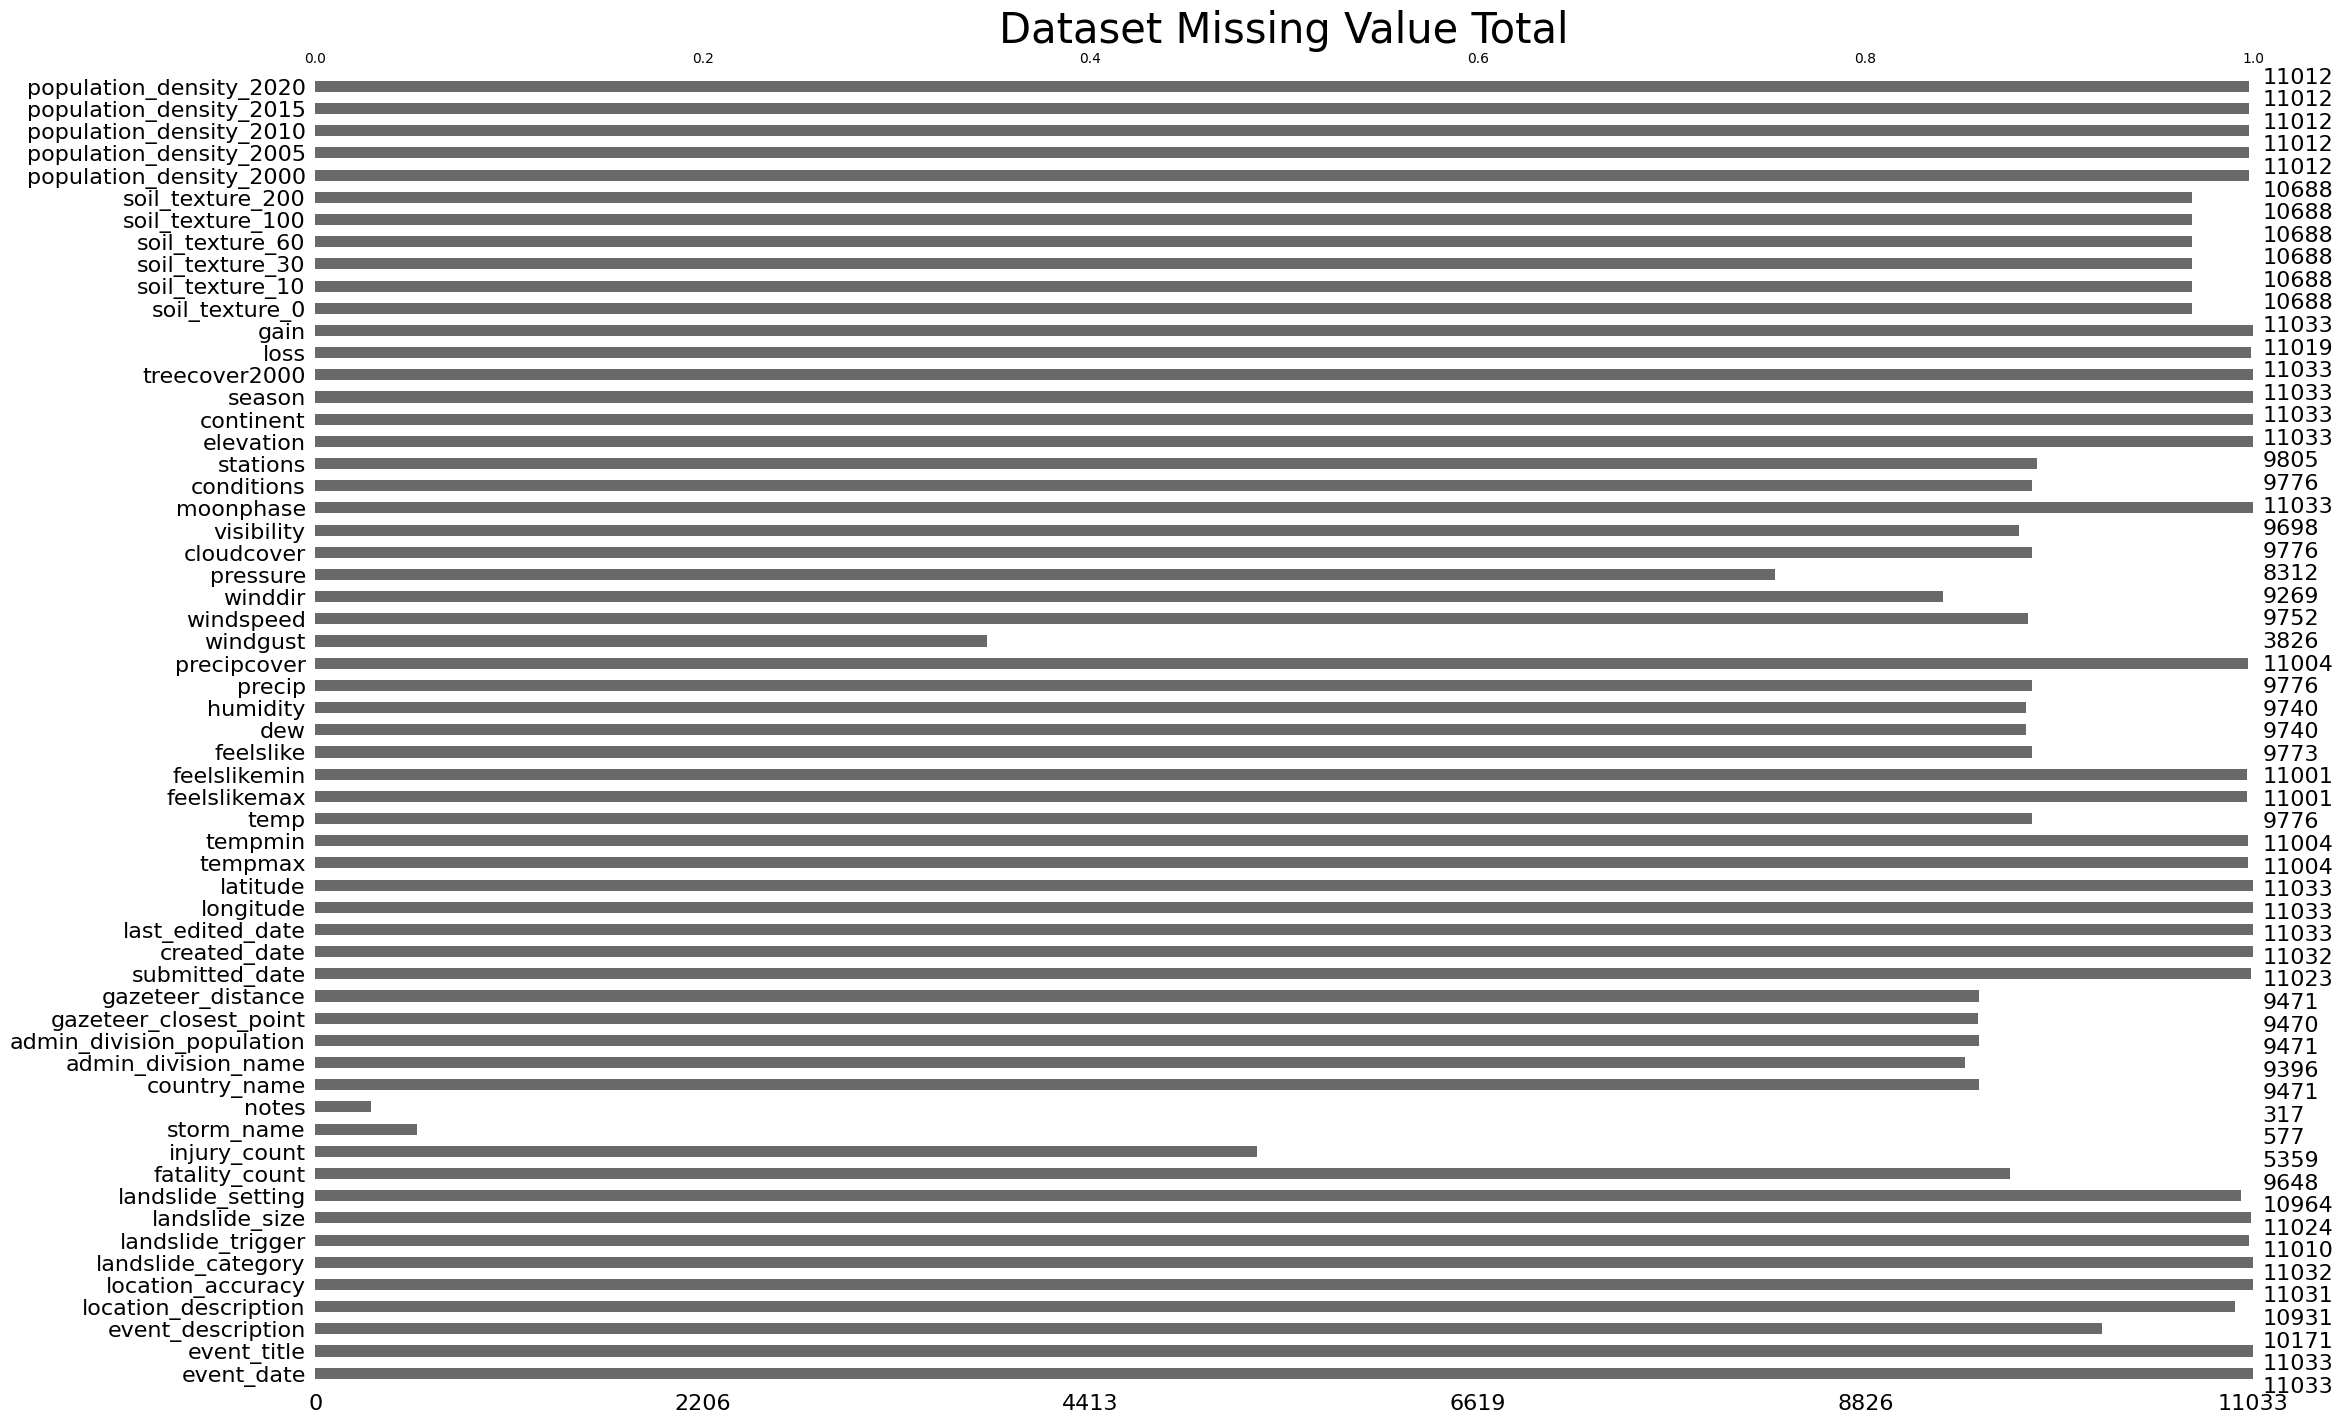

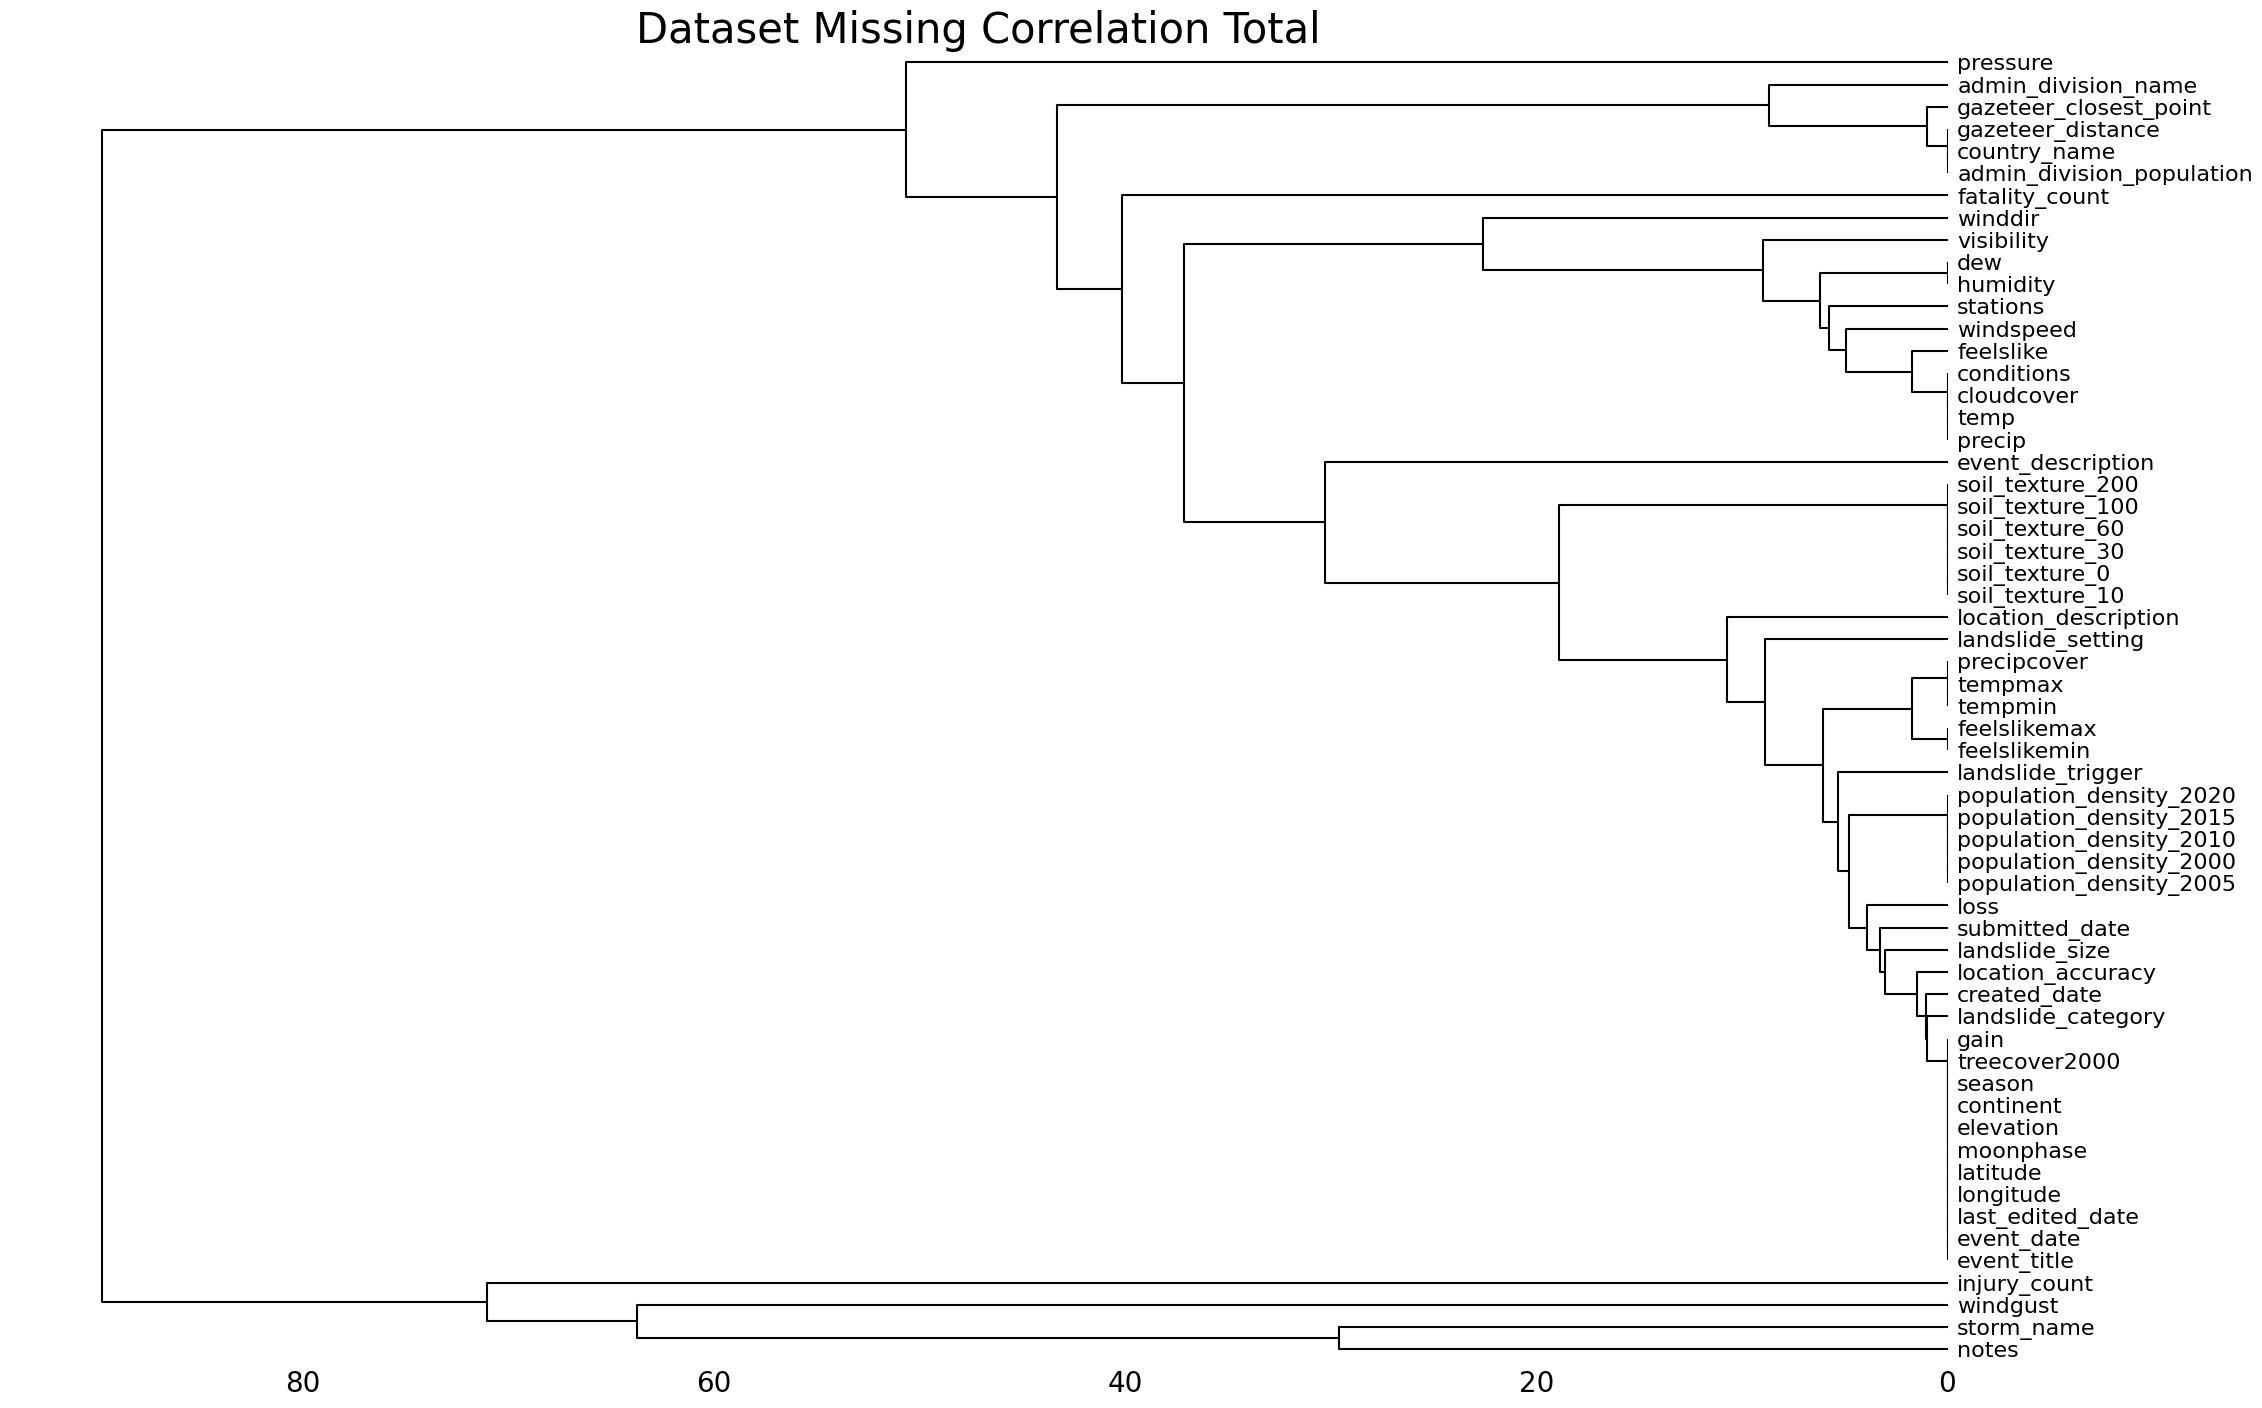

In [12]:
draw_missing(df, "Total")

In [13]:
df.isnull().sum()

event_date                       0
event_title                      0
event_description              862
location_description           102
location_accuracy                2
landslide_category               1
landslide_trigger               23
landslide_size                   9
landslide_setting               69
fatality_count                1385
injury_count                  5674
storm_name                   10456
notes                        10716
country_name                  1562
admin_division_name           1637
admin_division_population     1562
gazeteer_closest_point        1563
gazeteer_distance             1562
submitted_date                  10
created_date                     1
last_edited_date                 0
longitude                        0
latitude                         0
tempmax                         29
tempmin                         29
temp                          1257
feelslikemax                    32
feelslikemin                    32
feelslike           

In [14]:
drop_column(["notes", "storm_name"])

(11033, 57)


In [15]:
drop_column("windgust")

(11033, 56)


In [16]:
ft_target = ["landslide_size"]
another_ft = df.columns.difference(ft_target)
print(another_ft.shape)
another_ft

(55,)


Index(['admin_division_name', 'admin_division_population', 'cloudcover', 'conditions', 'continent', 'country_name', 'created_date', 'dew', 'elevation', 'event_date', 'event_description',
       'event_title', 'fatality_count', 'feelslike', 'feelslikemax', 'feelslikemin', 'gain', 'gazeteer_closest_point', 'gazeteer_distance', 'humidity', 'injury_count', 'landslide_category',
       'landslide_setting', 'landslide_trigger', 'last_edited_date', 'latitude', 'location_accuracy', 'location_description', 'longitude', 'loss', 'moonphase', 'population_density_2000',
       'population_density_2005', 'population_density_2010', 'population_density_2015', 'population_density_2020', 'precip', 'precipcover', 'pressure', 'season', 'soil_texture_0', 'soil_texture_10',
       'soil_texture_100', 'soil_texture_200', 'soil_texture_30', 'soil_texture_60', 'stations', 'submitted_date', 'temp', 'tempmax', 'tempmin', 'treecover2000', 'visibility', 'winddir',
       'windspeed'],
      dtype='object')

In [17]:
ft_numeric = df.select_dtypes(include=[np.number]).columns
ft_categorical = df.select_dtypes(exclude=[np.number]).columns
print(ft_numeric)
print(ft_categorical)

Index(['fatality_count', 'injury_count', 'admin_division_population', 'gazeteer_distance', 'longitude', 'latitude', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew',
       'humidity', 'precip', 'precipcover', 'windspeed', 'winddir', 'pressure', 'cloudcover', 'visibility', 'moonphase', 'elevation', 'treecover2000', 'loss', 'gain', 'population_density_2000',
       'population_density_2005', 'population_density_2010', 'population_density_2015', 'population_density_2020'],
      dtype='object')
Index(['event_date', 'event_title', 'event_description', 'location_description', 'location_accuracy', 'landslide_category', 'landslide_trigger', 'landslide_size', 'landslide_setting', 'country_name',
       'admin_division_name', 'gazeteer_closest_point', 'submitted_date', 'created_date', 'last_edited_date', 'conditions', 'stations', 'continent', 'season', 'soil_texture_0', 'soil_texture_10',
       'soil_texture_30', 'soil_texture_60', 'soil_texture_100', 'soil_tex

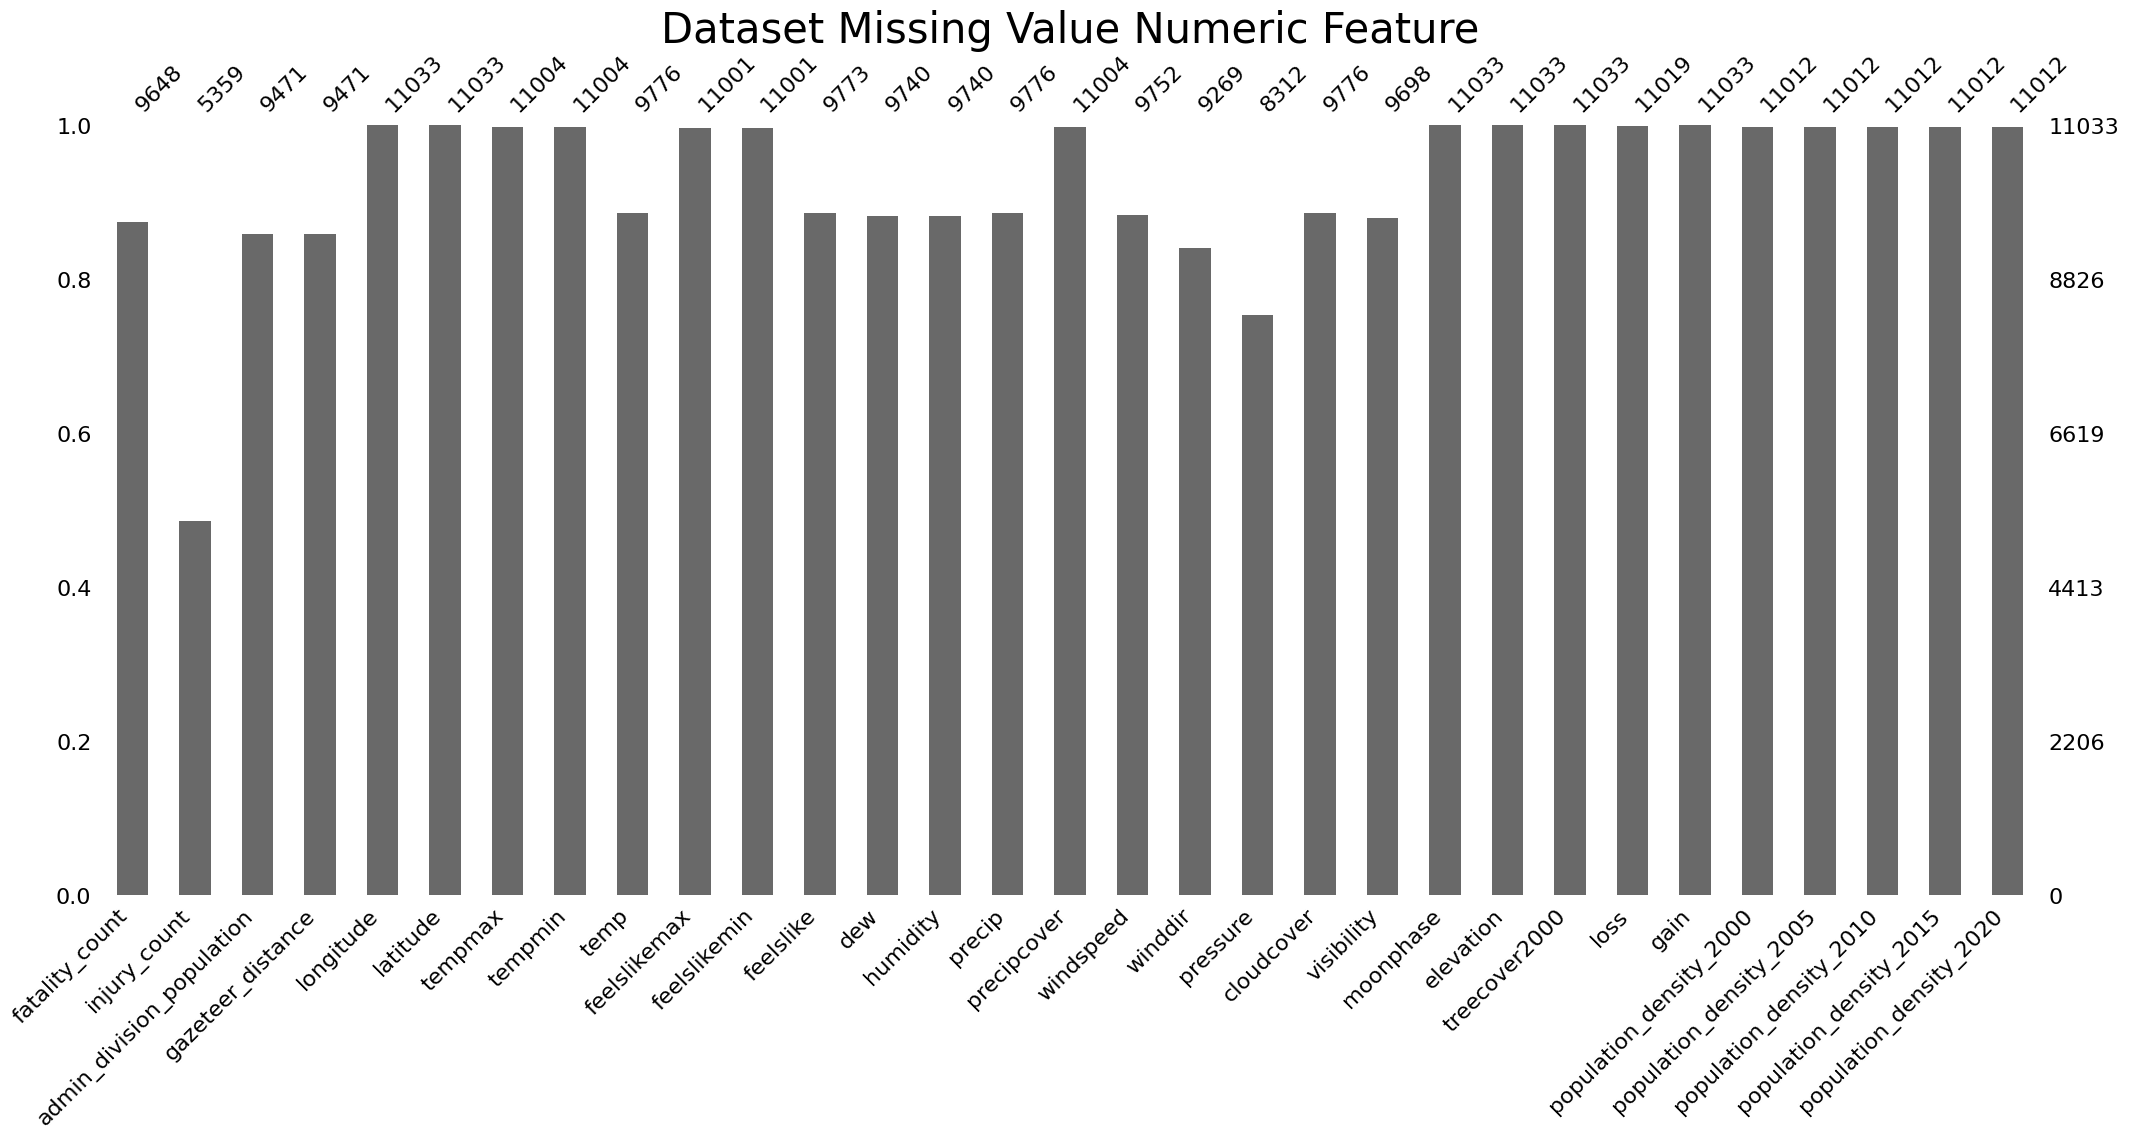

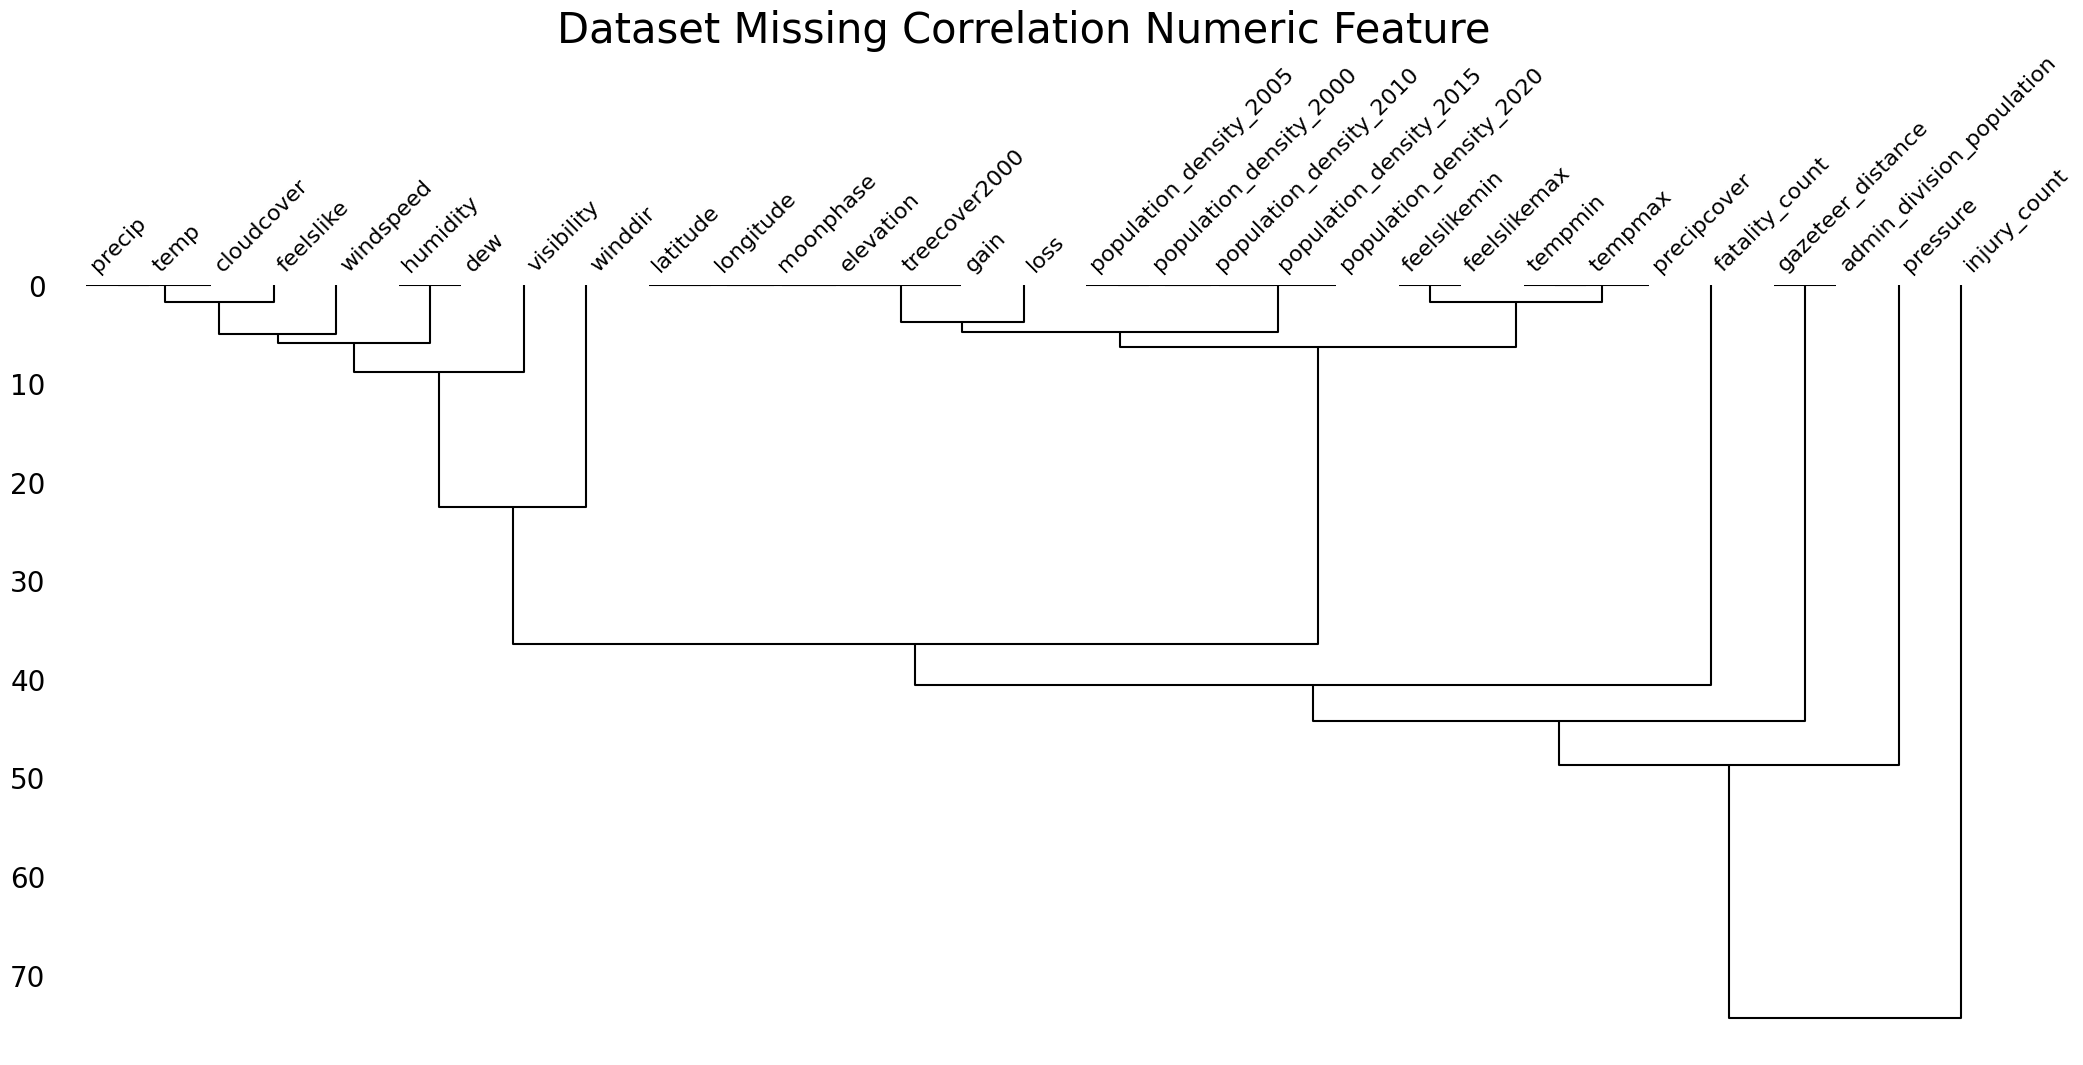

In [18]:
draw_missing(df[df.select_dtypes(include=[np.number]).columns], "Numeric Feature")

In [19]:
ft_numeric_missing = df[ft_numeric].isnull().sum().sort_values(ascending=False)
ft_numeric_missing

injury_count                 5674
pressure                     2721
winddir                      1764
admin_division_population    1562
gazeteer_distance            1562
fatality_count               1385
visibility                   1335
dew                          1293
humidity                     1293
windspeed                    1281
feelslike                    1260
cloudcover                   1257
temp                         1257
precip                       1257
feelslikemax                   32
feelslikemin                   32
precipcover                    29
tempmin                        29
tempmax                        29
population_density_2000        21
population_density_2005        21
population_density_2010        21
population_density_2015        21
population_density_2020        21
loss                           14
latitude                        0
longitude                       0
moonphase                       0
elevation                       0
treecover2000 

In [20]:
df_population = df[["population_density_2000","population_density_2005","population_density_2010","population_density_2015","population_density_2020"]]
df_population_describe = df_population.describe()
df_population_describe

,population_density_2000,population_density_2005,population_density_2010,population_density_2015,population_density_2020
count,11012.000000,11012.000000,11012.000000,11012.000000,11012.000000
mean,947.034477,1012.453956,1072.516946,1131.269529,1186.122776
std,3608.653570,3853.334119,4069.254126,4308.243183,4579.135989
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.686822,18.781477,19.568130,20.564828,20.669706
50%,114.487339,120.508583,125.604374,127.966175,128.409210
75%,516.926208,547.931641,571.013550,596.621216,608.164368
max,110884.898438,116474.906250,121829.195312,126877.765625,130805.859375


<Axes: >

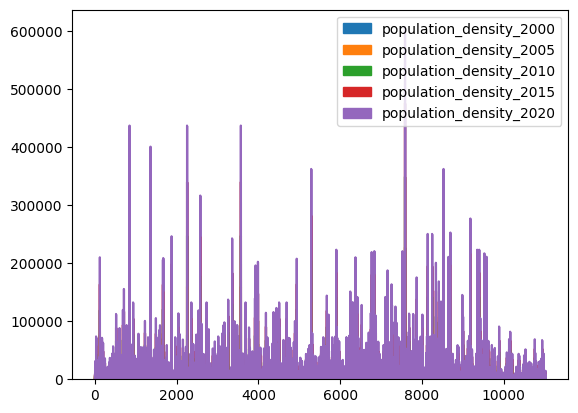

In [21]:
df_population.plot(kind="area")

<Axes: >

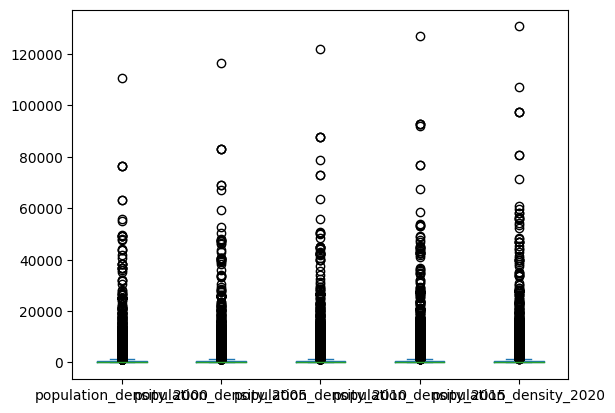

In [22]:
df_population.plot(kind="box")

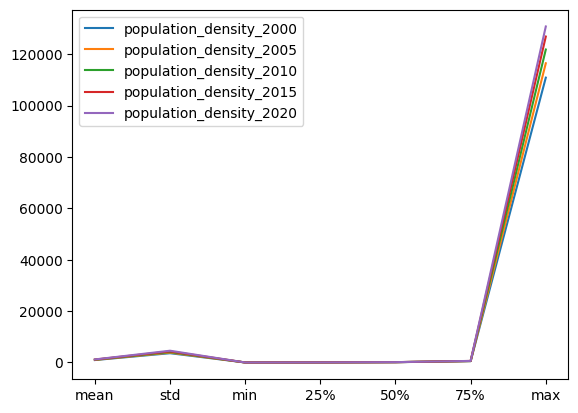

In [23]:
plt.plot(["mean","std","min","25%","50%","75%","max"],[947.034477,3608.653570,0.000000,17.686822,114.487339,516.926208,110884.898438])
plt.plot(["mean","std","min","25%","50%","75%","max"],[1012.453956,3853.334119,0.000000,18.781477,120.508583,547.931641,116474.906250])
plt.plot(["mean","std","min","25%","50%","75%","max"],[1072.516946,4069.254126,0.000000,19.568130,125.604374,571.013550,121829.195312])
plt.plot(["mean","std","min","25%","50%","75%","max"],[1131.269529,4308.243183,0.000000,20.564828,127.966175,596.621216,126877.765625])
plt.plot(["mean","std","min","25%","50%","75%","max"],[1186.122776,4579.135989,0.000000,20.669706,128.409210,608.164368,130805.859375])

plt.gca().legend(['population_density_2000',"population_density_2005","population_density_2010","population_density_2015","population_density_2020"])
plt.show()

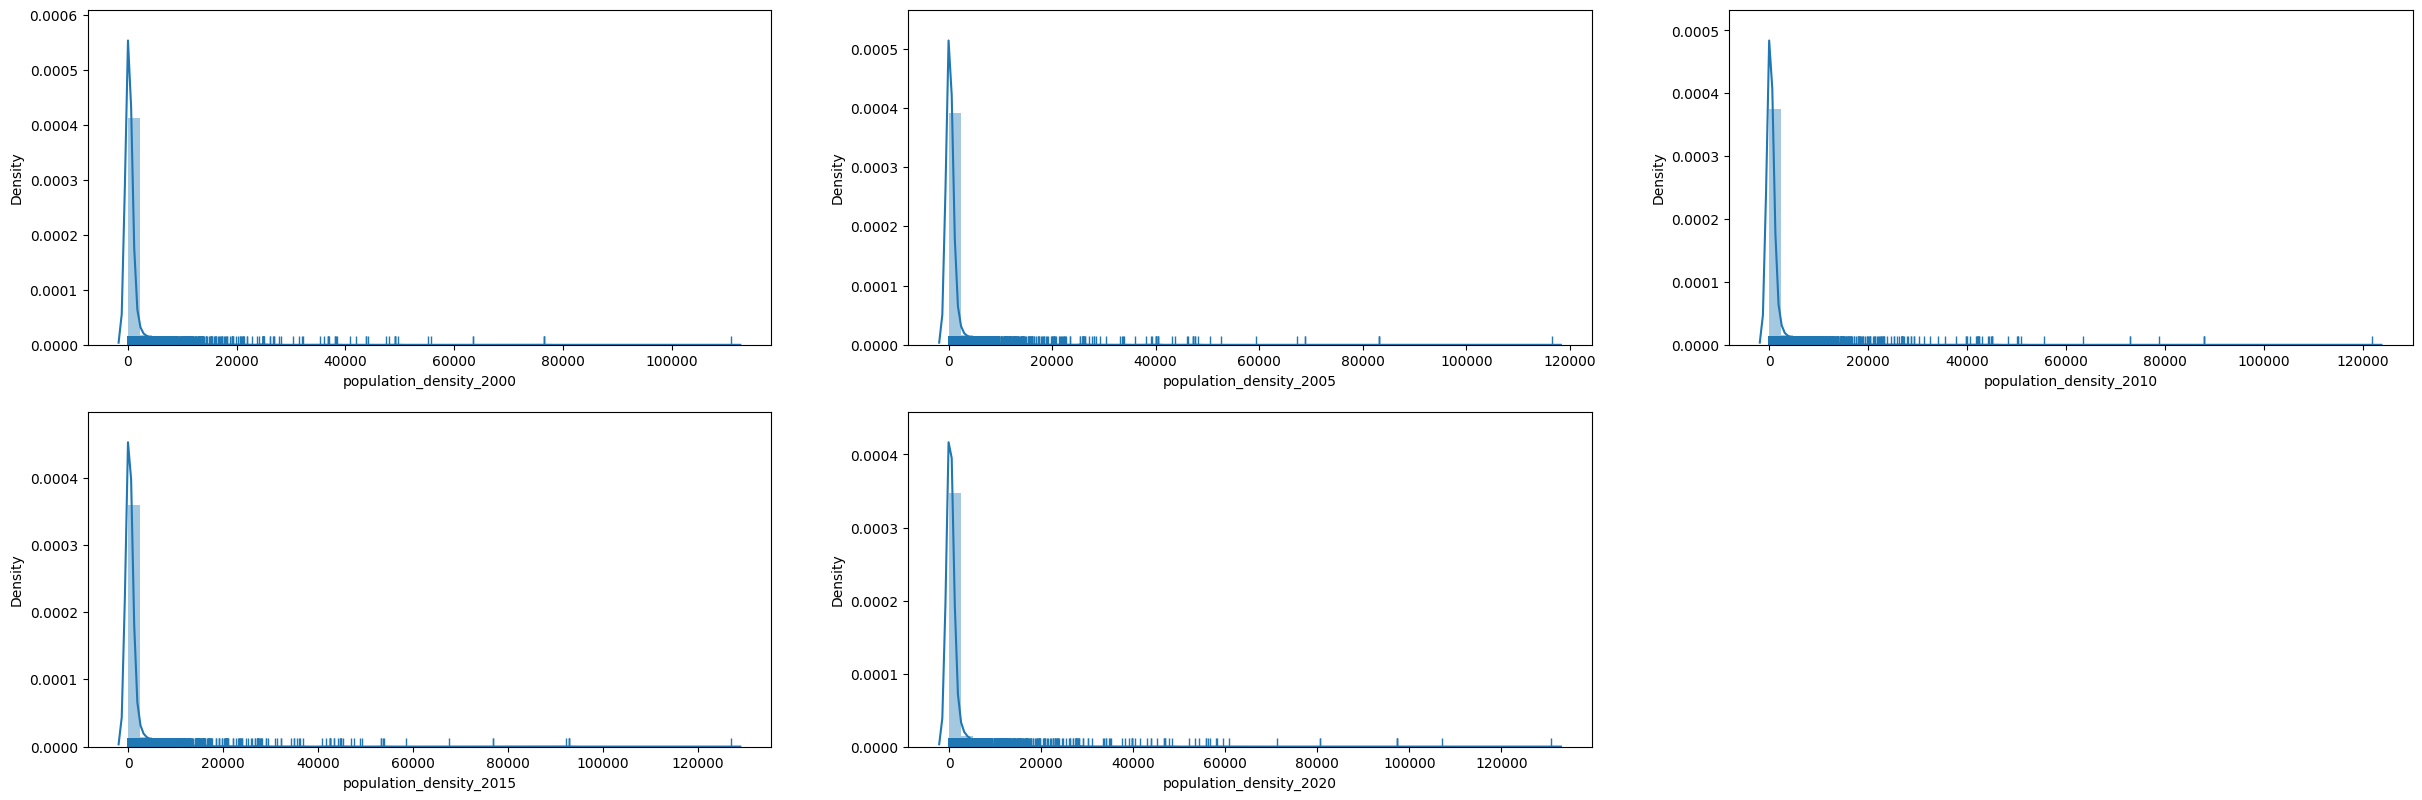

In [24]:
fig = plt.figure(figsize=(30,20))
for i in range(len(df_population.columns)):
    ax = plt.subplot(4, 3, i+1)
    sns.distplot(df_population[df_population.columns[i]], kde=True, rug=True, ax=ax)

In [25]:
df.shape

(11033, 56)

In [26]:
for i in df_population.columns:
    df[i].fillna(value=0, inplace=True)
df["populations"]=df["population_density_2015"]
drop_column(df_population.columns)

(11033, 52)


In [27]:
ft_numeric = df.select_dtypes(include=[np.number]).columns
ft_numeric


Index(['fatality_count', 'injury_count', 'admin_division_population', 'gazeteer_distance', 'longitude', 'latitude', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew',
       'humidity', 'precip', 'precipcover', 'windspeed', 'winddir', 'pressure', 'cloudcover', 'visibility', 'moonphase', 'elevation', 'treecover2000', 'loss', 'gain', 'populations'],
      dtype='object')

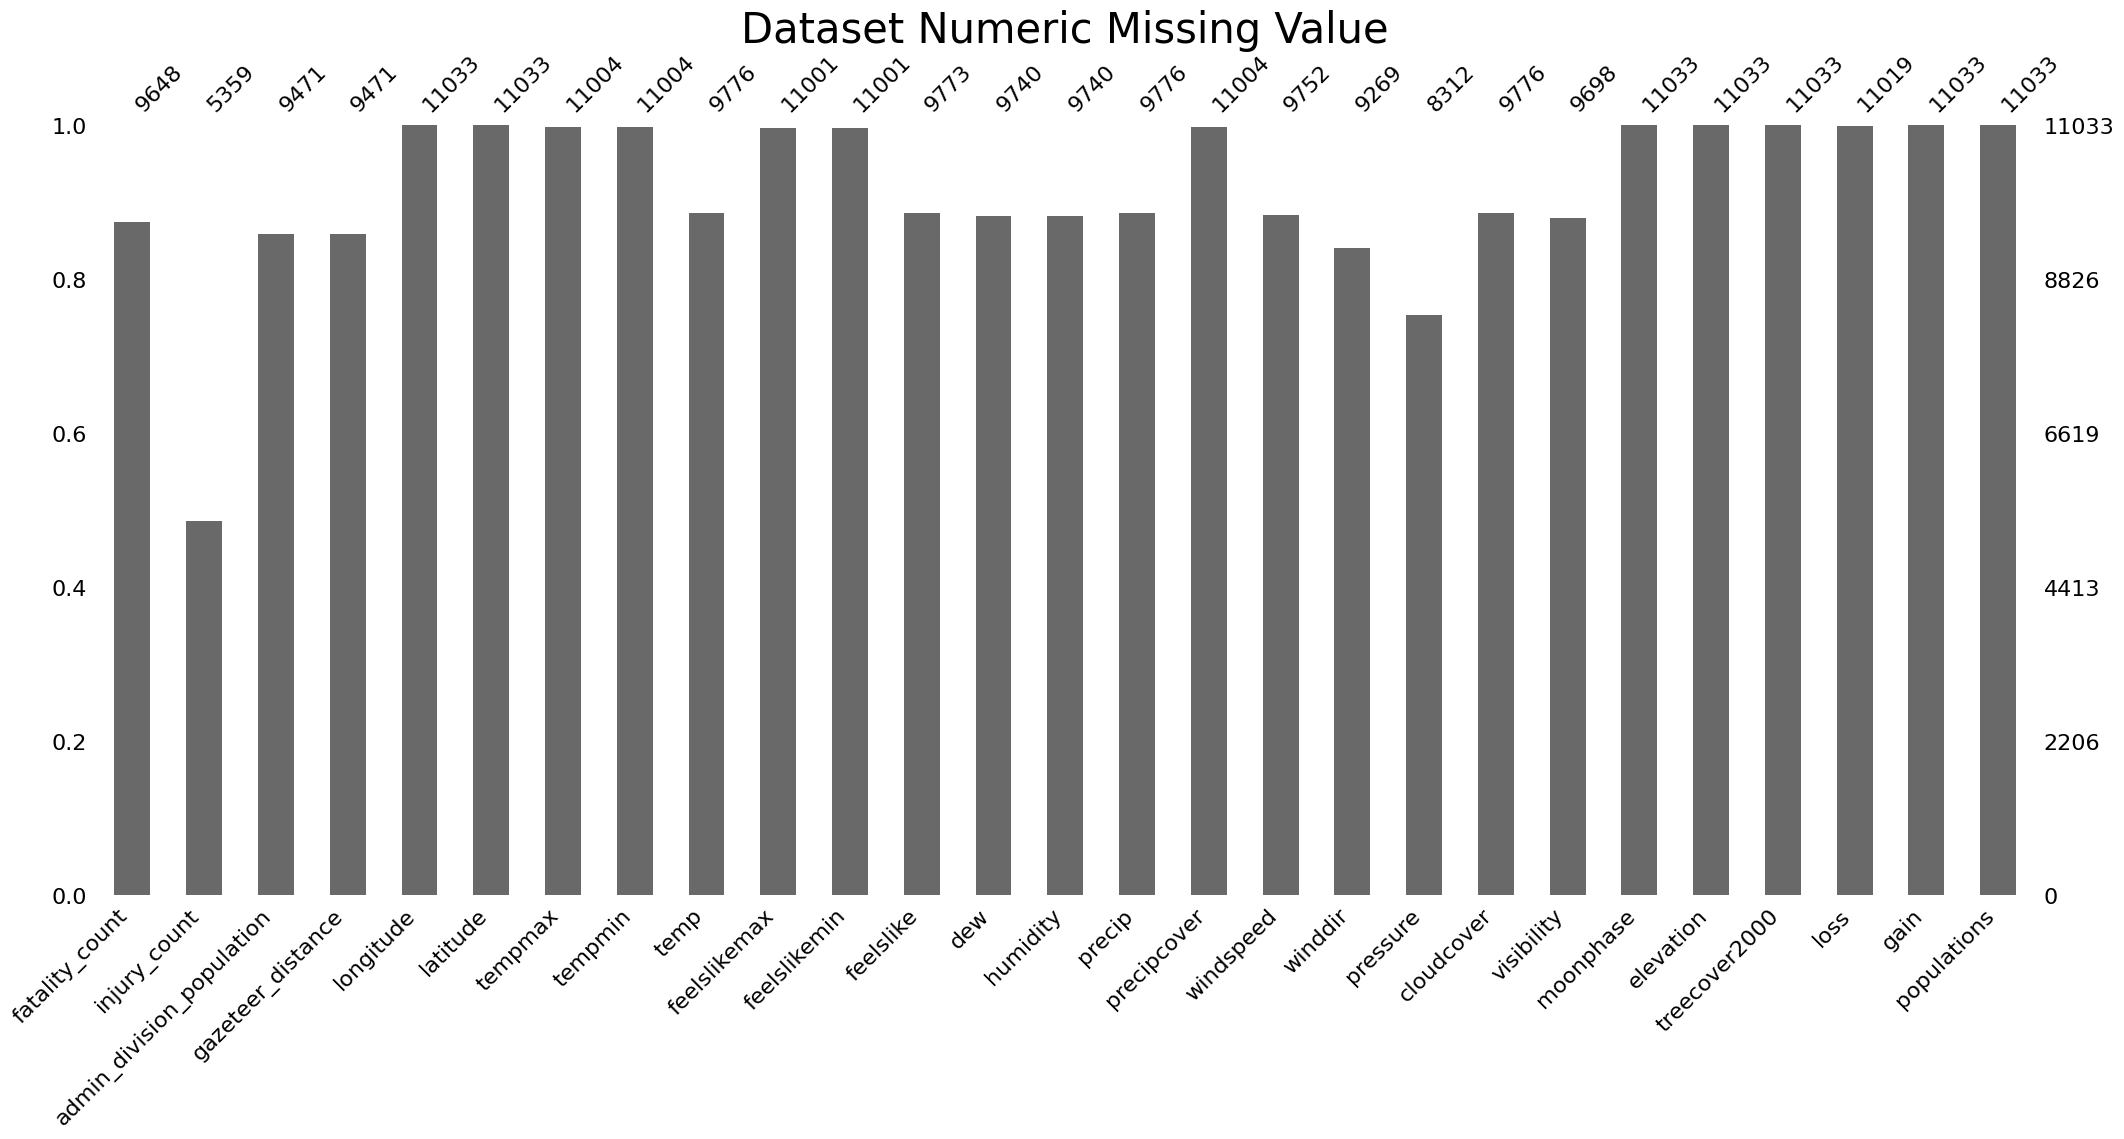

In [28]:
#missing value
msno.bar(df[ft_numeric])
plt.title("Dataset Numeric Missing Value", fontsize = 30)
plt.show()

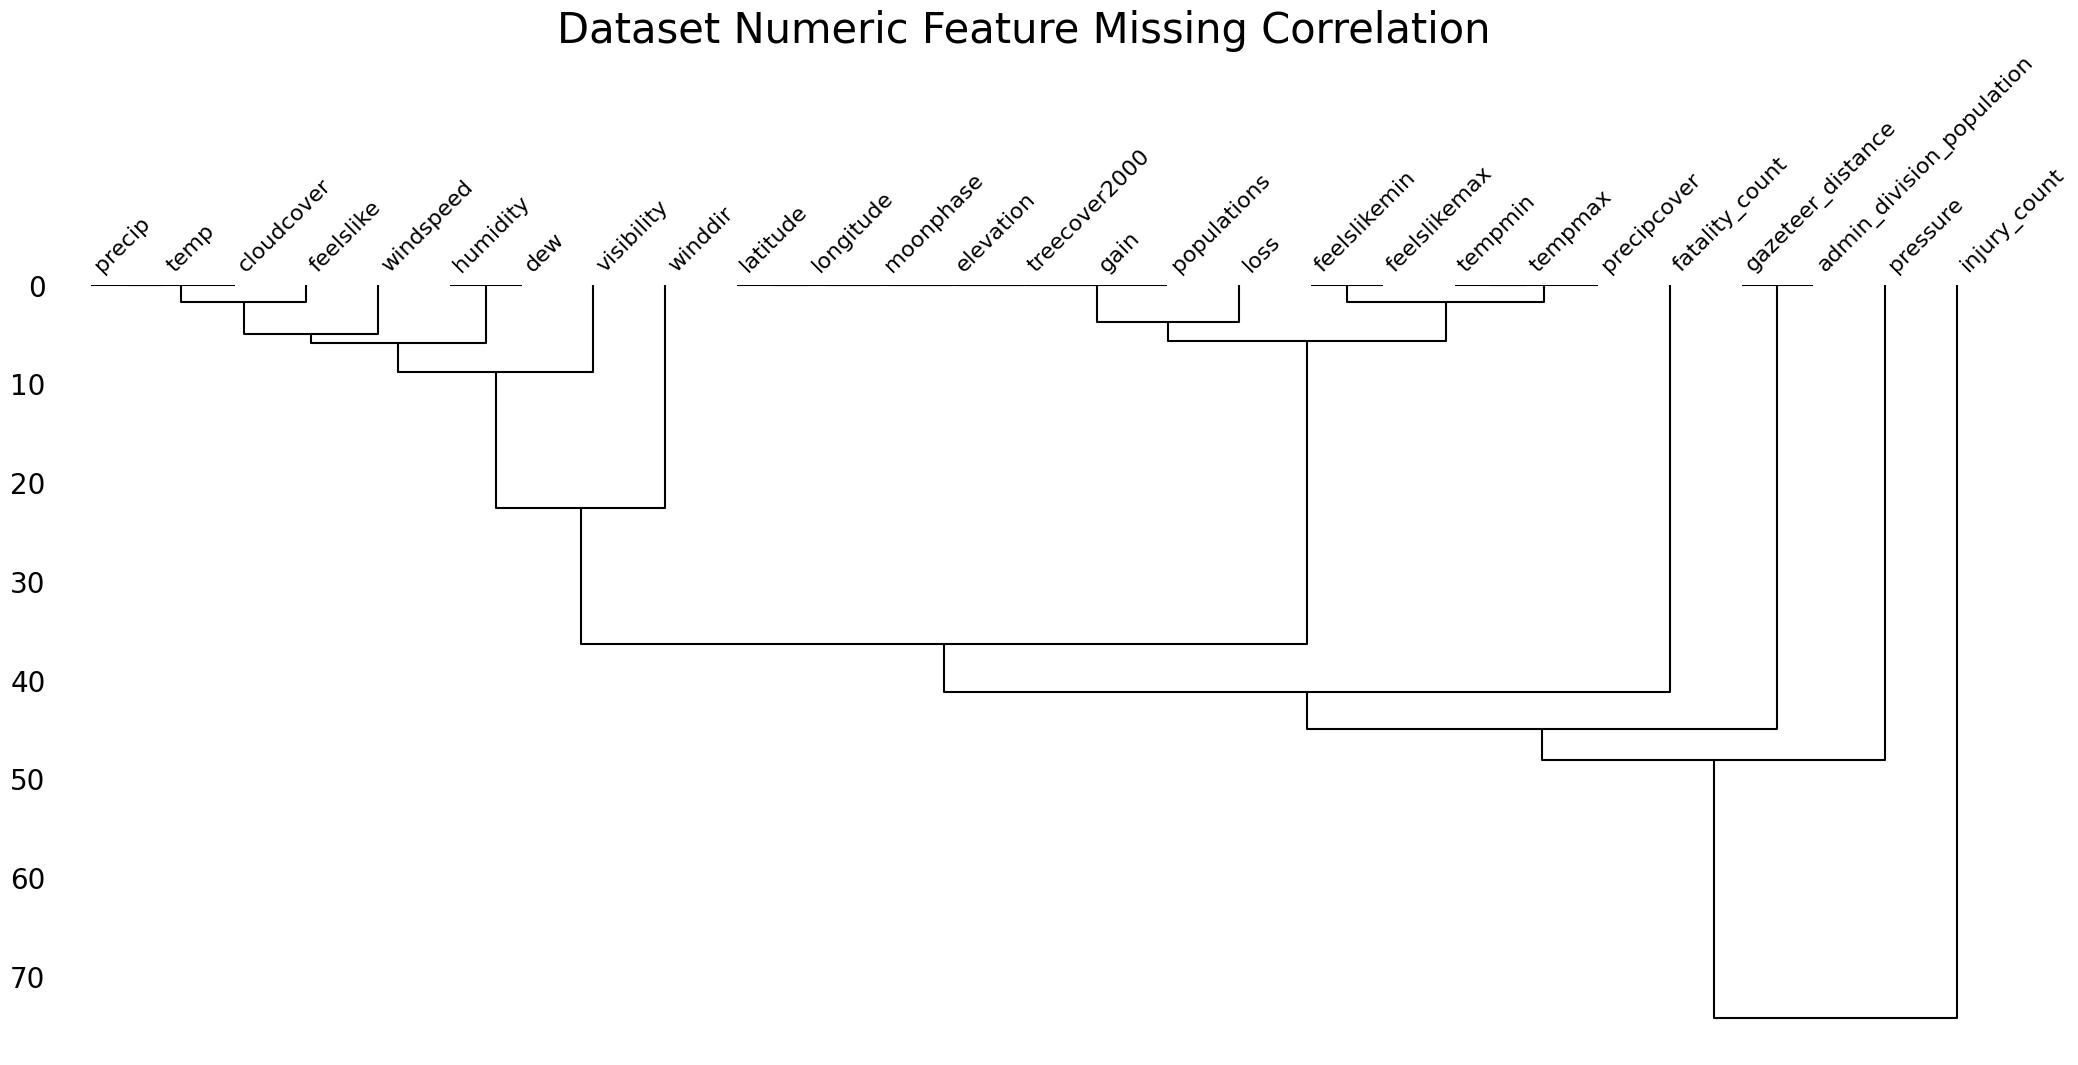

In [29]:
msno.dendrogram(df[ft_numeric])
plt.title("Dataset Numeric Feature Missing Correlation", fontsize = 30)
plt.show()

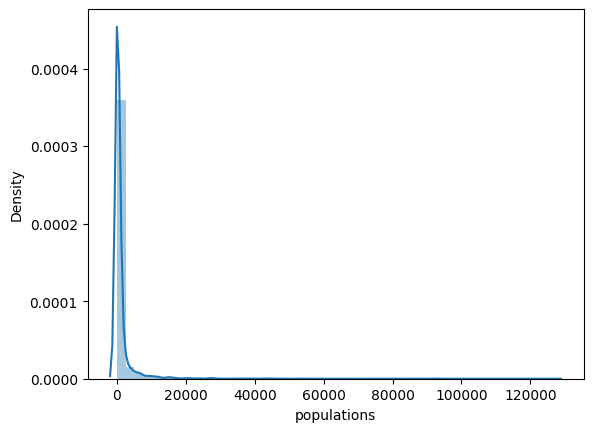

In [30]:
ax = sns.distplot(df["populations"], kde=True)
plt.show()

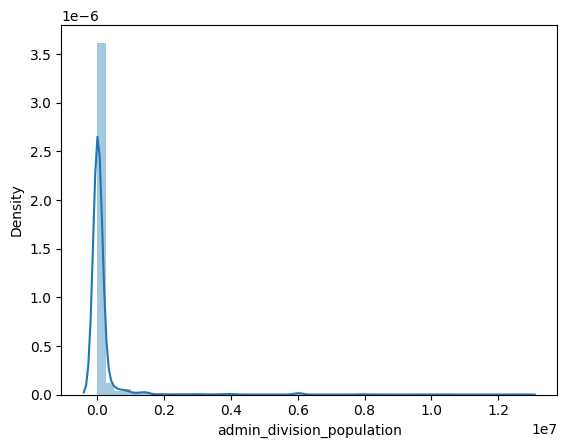

In [31]:
ax = sns.distplot(df["admin_division_population"], kde=True)
plt.show()

In [32]:
drop_column("admin_division_population")

(11033, 51)


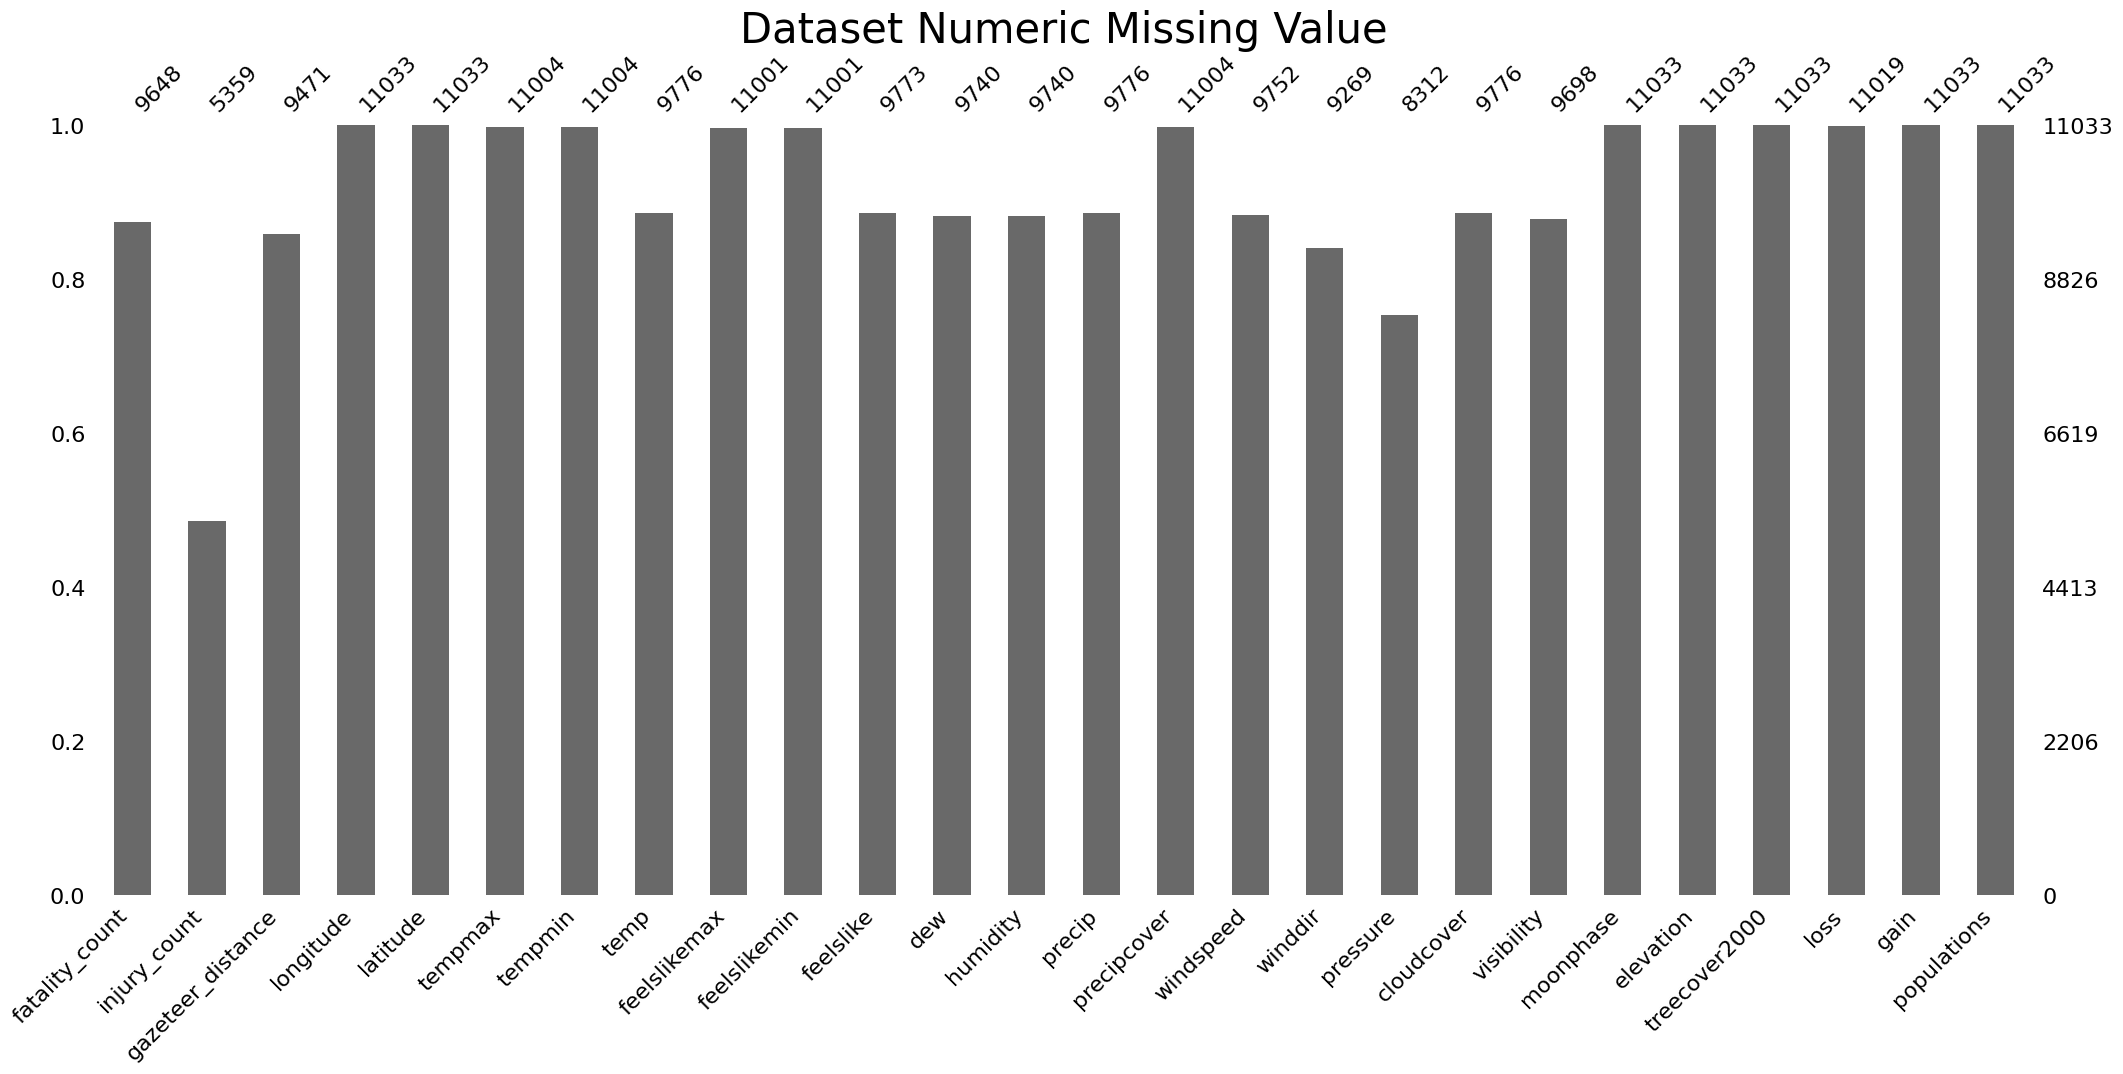

Index(['fatality_count', 'injury_count', 'gazeteer_distance', 'longitude', 'latitude', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip',
       'precipcover', 'windspeed', 'winddir', 'pressure', 'cloudcover', 'visibility', 'moonphase', 'elevation', 'treecover2000', 'loss', 'gain', 'populations'],
      dtype='object')


In [33]:
msno.bar(df[df.select_dtypes(include=np.number).columns])
plt.title("Dataset Numeric Missing Value", fontsize = 30)
plt.show()
print(df.select_dtypes(include=np.number).columns)

In [34]:
drop_column(['visibility','winddir','feelslikemax', 'feelslikemin', 'feelslike'])

(11033, 46)


In [35]:
print(df.select_dtypes(include=np.number).columns)

Index(['fatality_count', 'injury_count', 'gazeteer_distance', 'longitude', 'latitude', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipcover', 'windspeed', 'pressure', 'cloudcover',
       'moonphase', 'elevation', 'treecover2000', 'loss', 'gain', 'populations'],
      dtype='object')


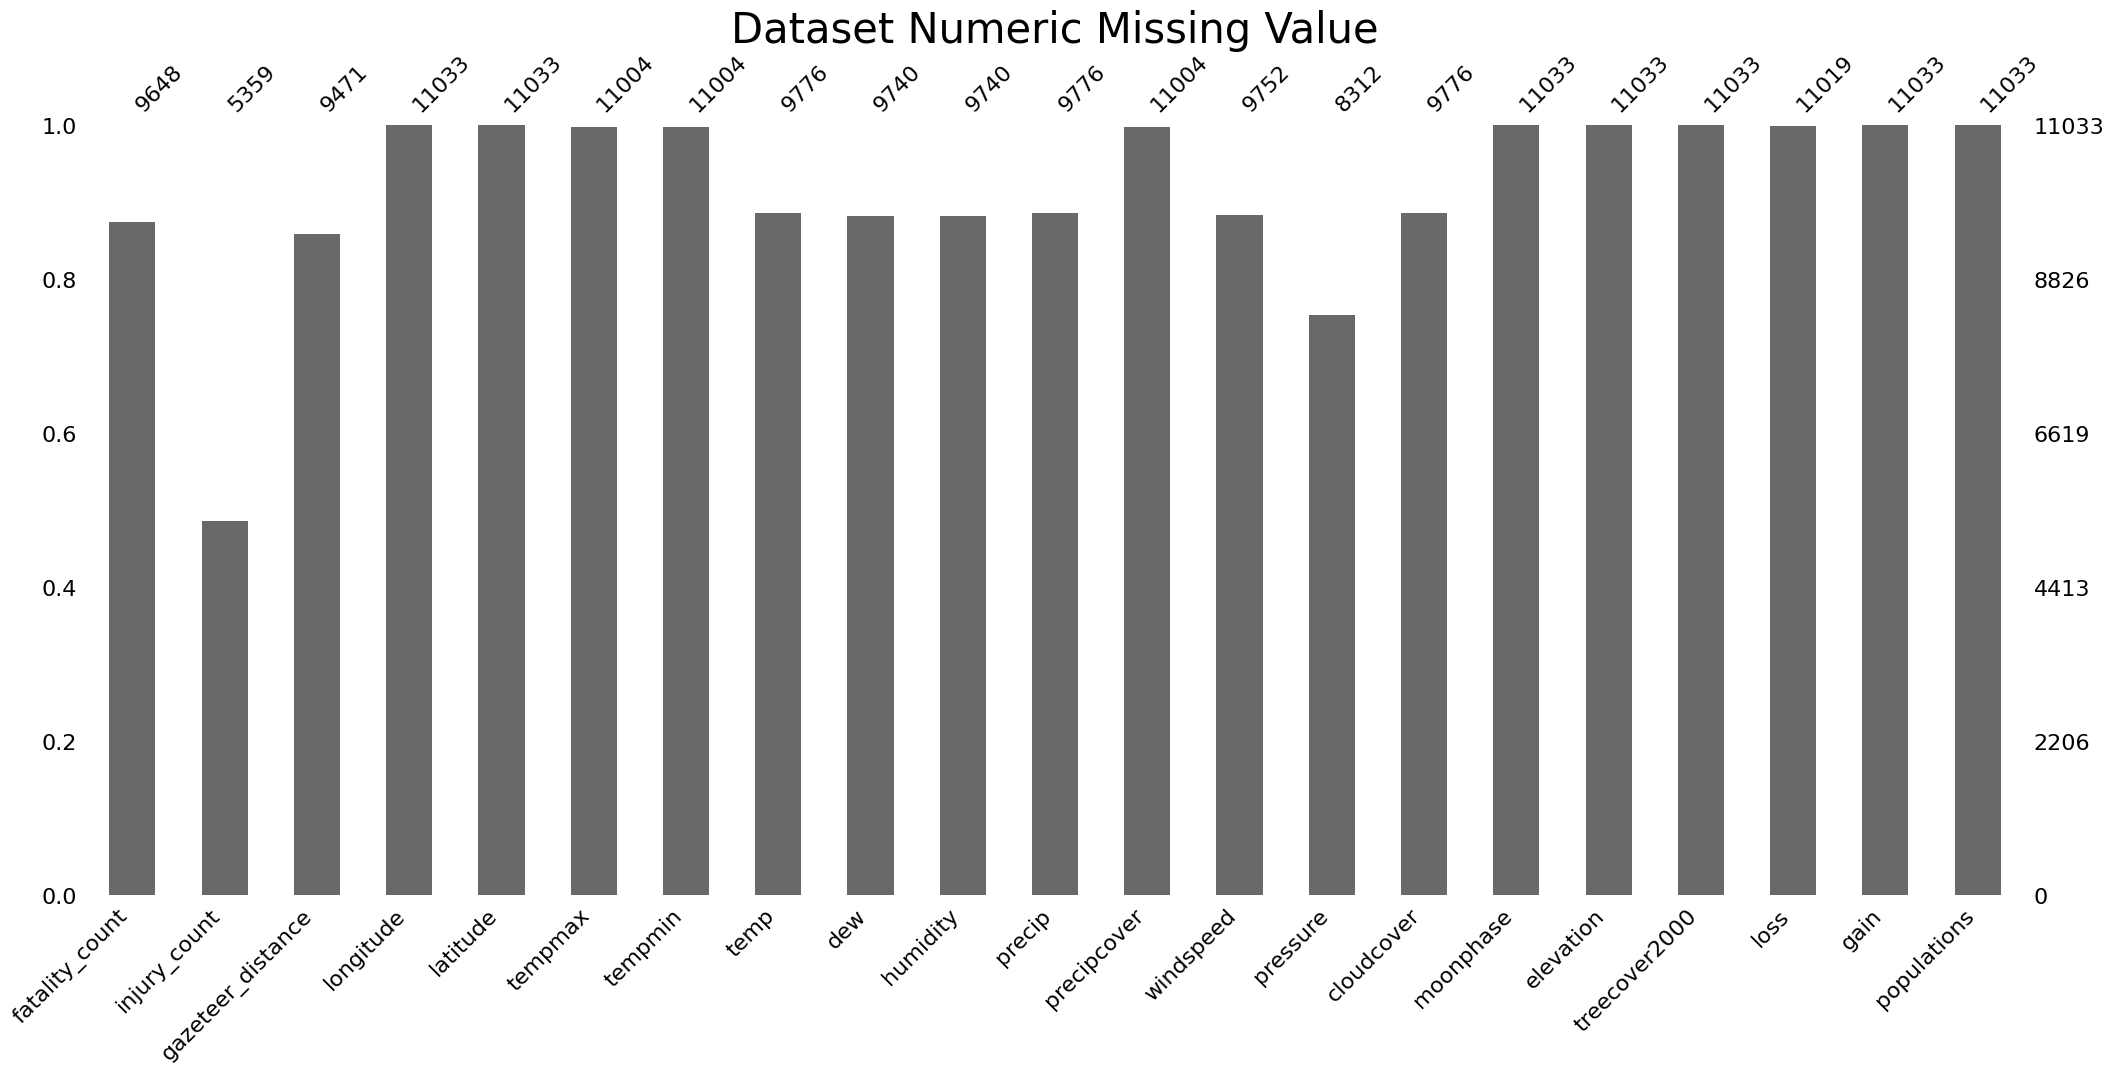

Index(['fatality_count', 'injury_count', 'gazeteer_distance', 'longitude', 'latitude', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipcover', 'windspeed', 'pressure', 'cloudcover',
       'moonphase', 'elevation', 'treecover2000', 'loss', 'gain', 'populations'],
      dtype='object')


In [36]:
msno.bar(df[df.select_dtypes(include=np.number).columns])
plt.title("Dataset Numeric Missing Value", fontsize = 30)
plt.show()
print(df.select_dtypes(include=np.number).columns)

In [37]:
df["fatality_count"].fillna(value=df["fatality_count"].median(), inplace=True)

In [38]:
df["injury_count"].fillna(value=df["fatality_count"].median(), inplace=True)

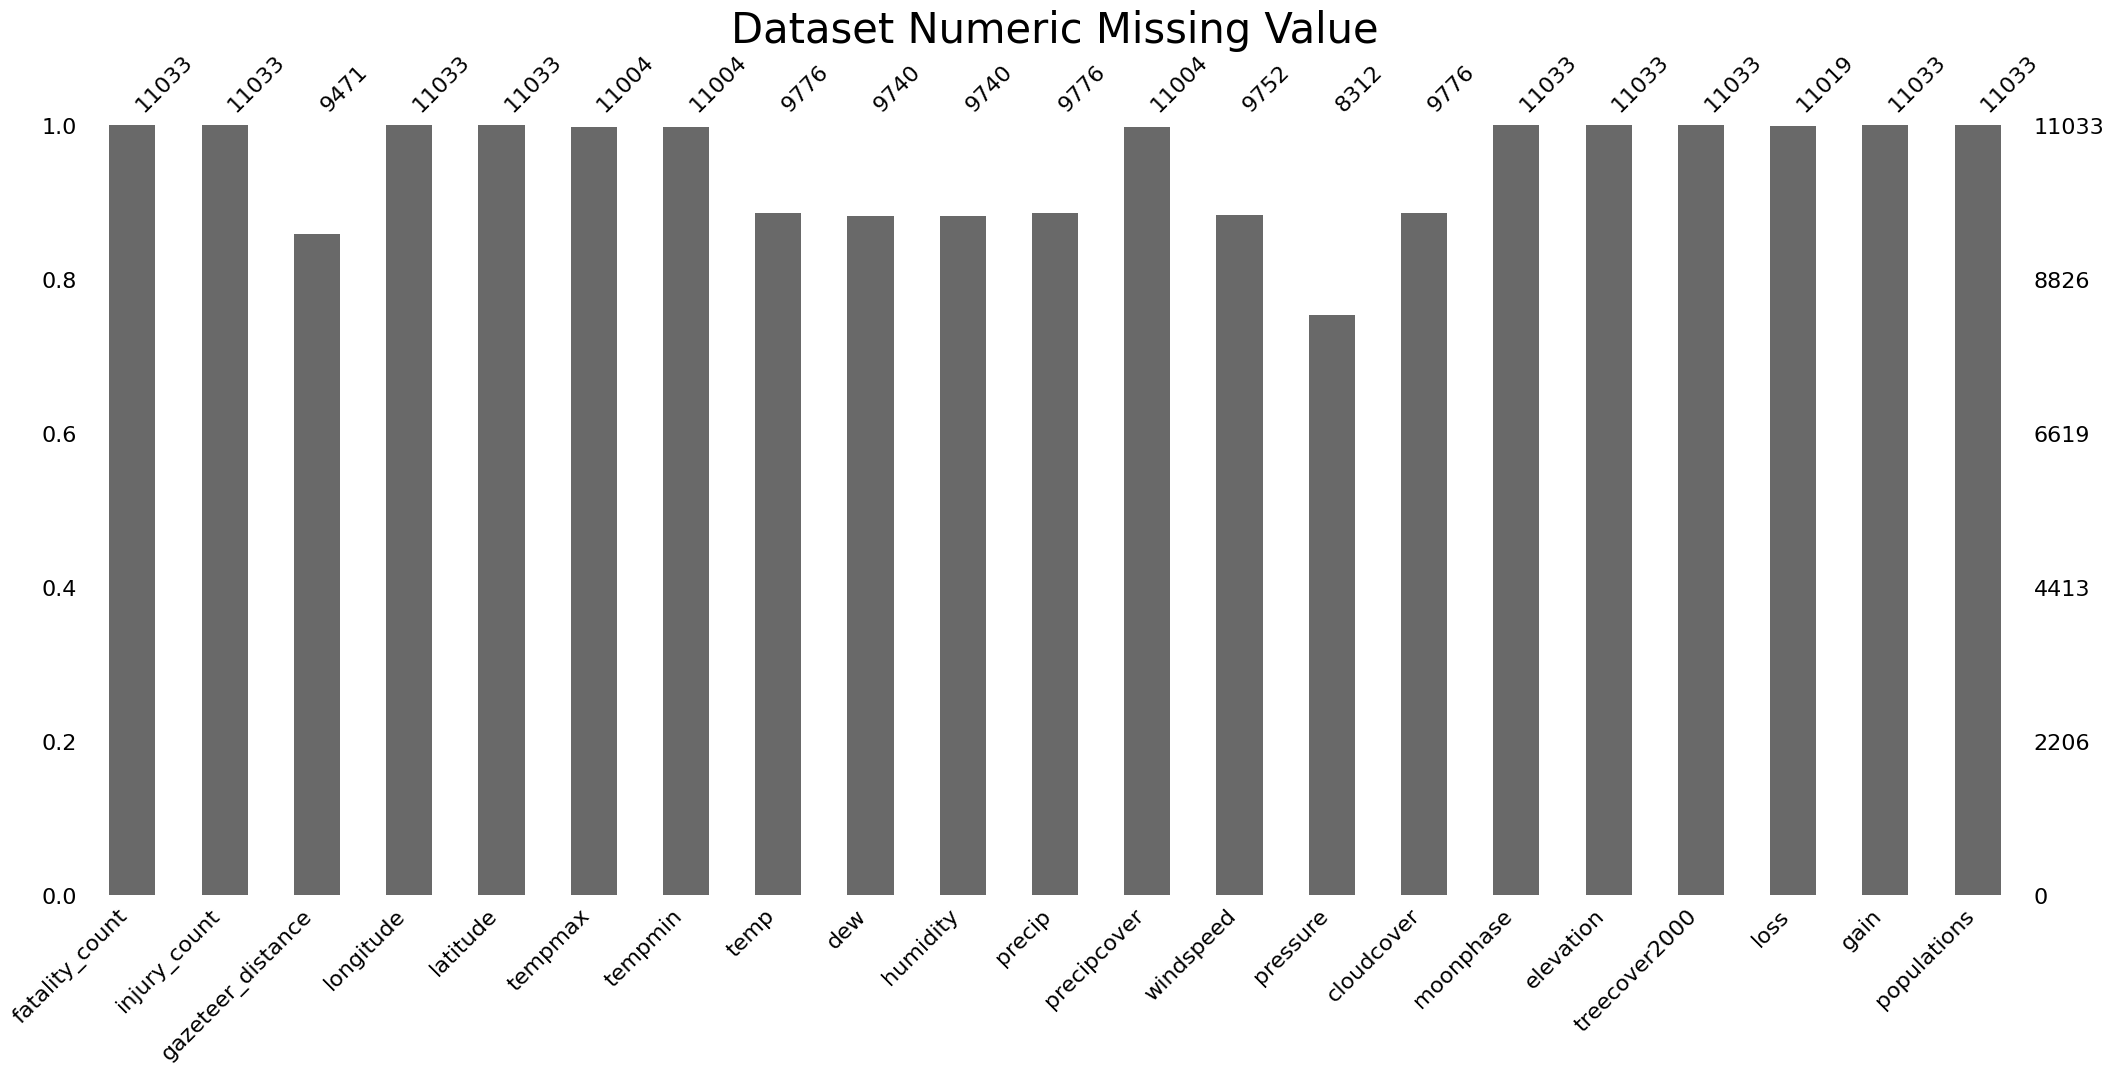

Index(['fatality_count', 'injury_count', 'gazeteer_distance', 'longitude', 'latitude', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipcover', 'windspeed', 'pressure', 'cloudcover',
       'moonphase', 'elevation', 'treecover2000', 'loss', 'gain', 'populations'],
      dtype='object')


In [39]:
msno.bar(df[df.select_dtypes(include=np.number).columns])
plt.title("Dataset Numeric Missing Value", fontsize = 30)
plt.show()
print(df.select_dtypes(include=np.number).columns)

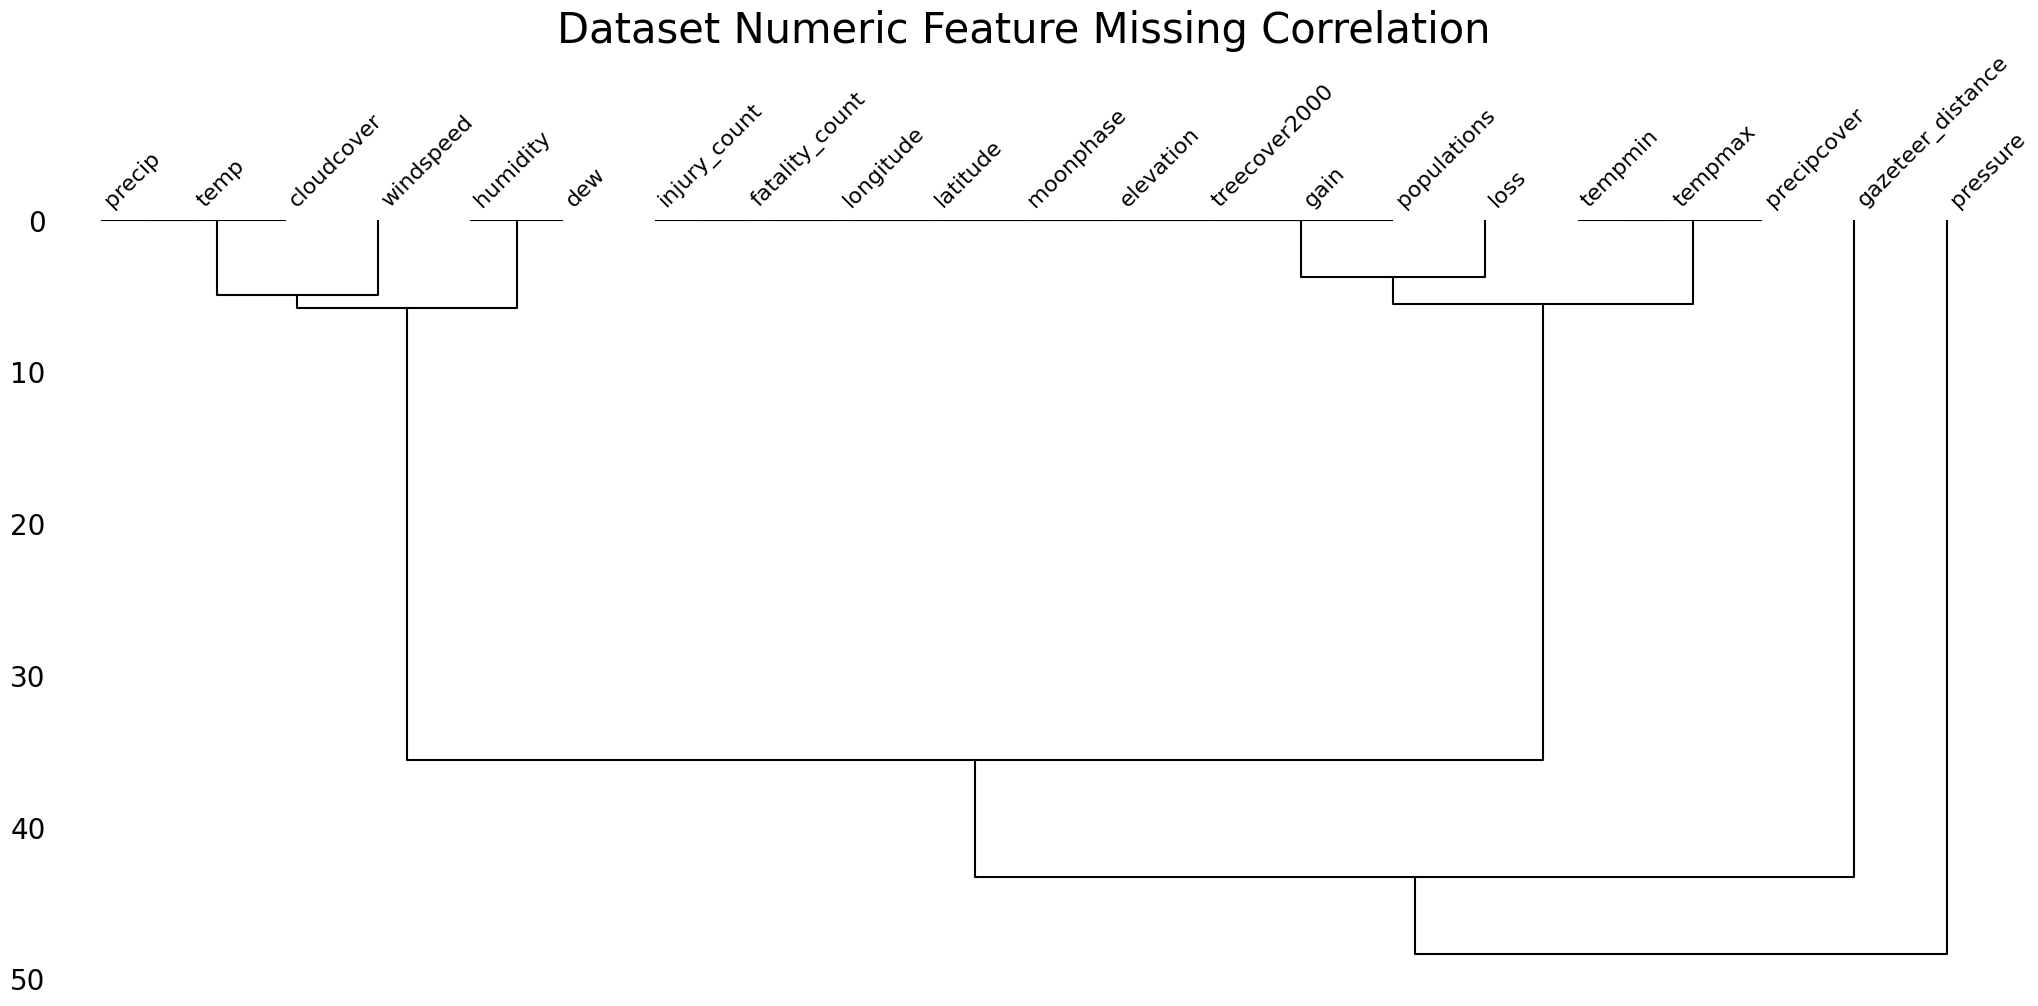

In [40]:
msno.dendrogram(df[df[df.select_dtypes(include=np.number).columns].isnull().columns])
plt.title("Dataset Numeric Feature Missing Correlation", fontsize = 30)
plt.show()

In [41]:
df.shape

(11033, 46)

<Axes: >

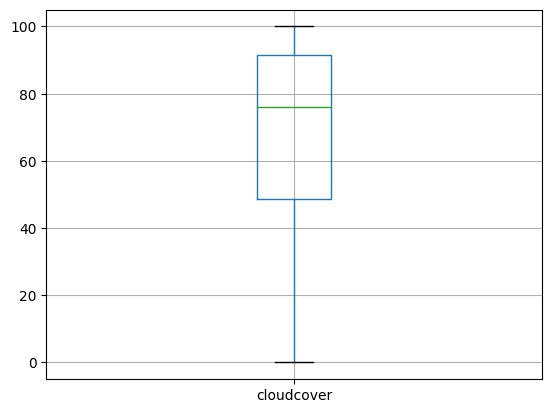

In [42]:
df.boxplot(["cloudcover"])

In [43]:
df.select_dtypes(include=np.number).isnull().sum()

fatality_count          0
injury_count            0
gazeteer_distance    1562
longitude               0
latitude                0
tempmax                29
tempmin                29
temp                 1257
dew                  1293
humidity             1293
precip               1257
precipcover            29
windspeed            1281
pressure             2721
cloudcover           1257
moonphase               0
elevation               0
treecover2000           0
loss                   14
gain                    0
populations             0
dtype: int64

In [44]:
drop_column("gazeteer_distance")
df.select_dtypes(include=np.number).isnull().sum()

(11033, 45)


fatality_count       0
injury_count         0
longitude            0
latitude             0
tempmax             29
tempmin             29
temp              1257
dew               1293
humidity          1293
precip            1257
precipcover         29
windspeed         1281
pressure          2721
cloudcover        1257
moonphase            0
elevation            0
treecover2000        0
loss                14
gain                 0
populations          0
dtype: int64

ValueError: num must be an integer with 1 <= num <= 16, not 17

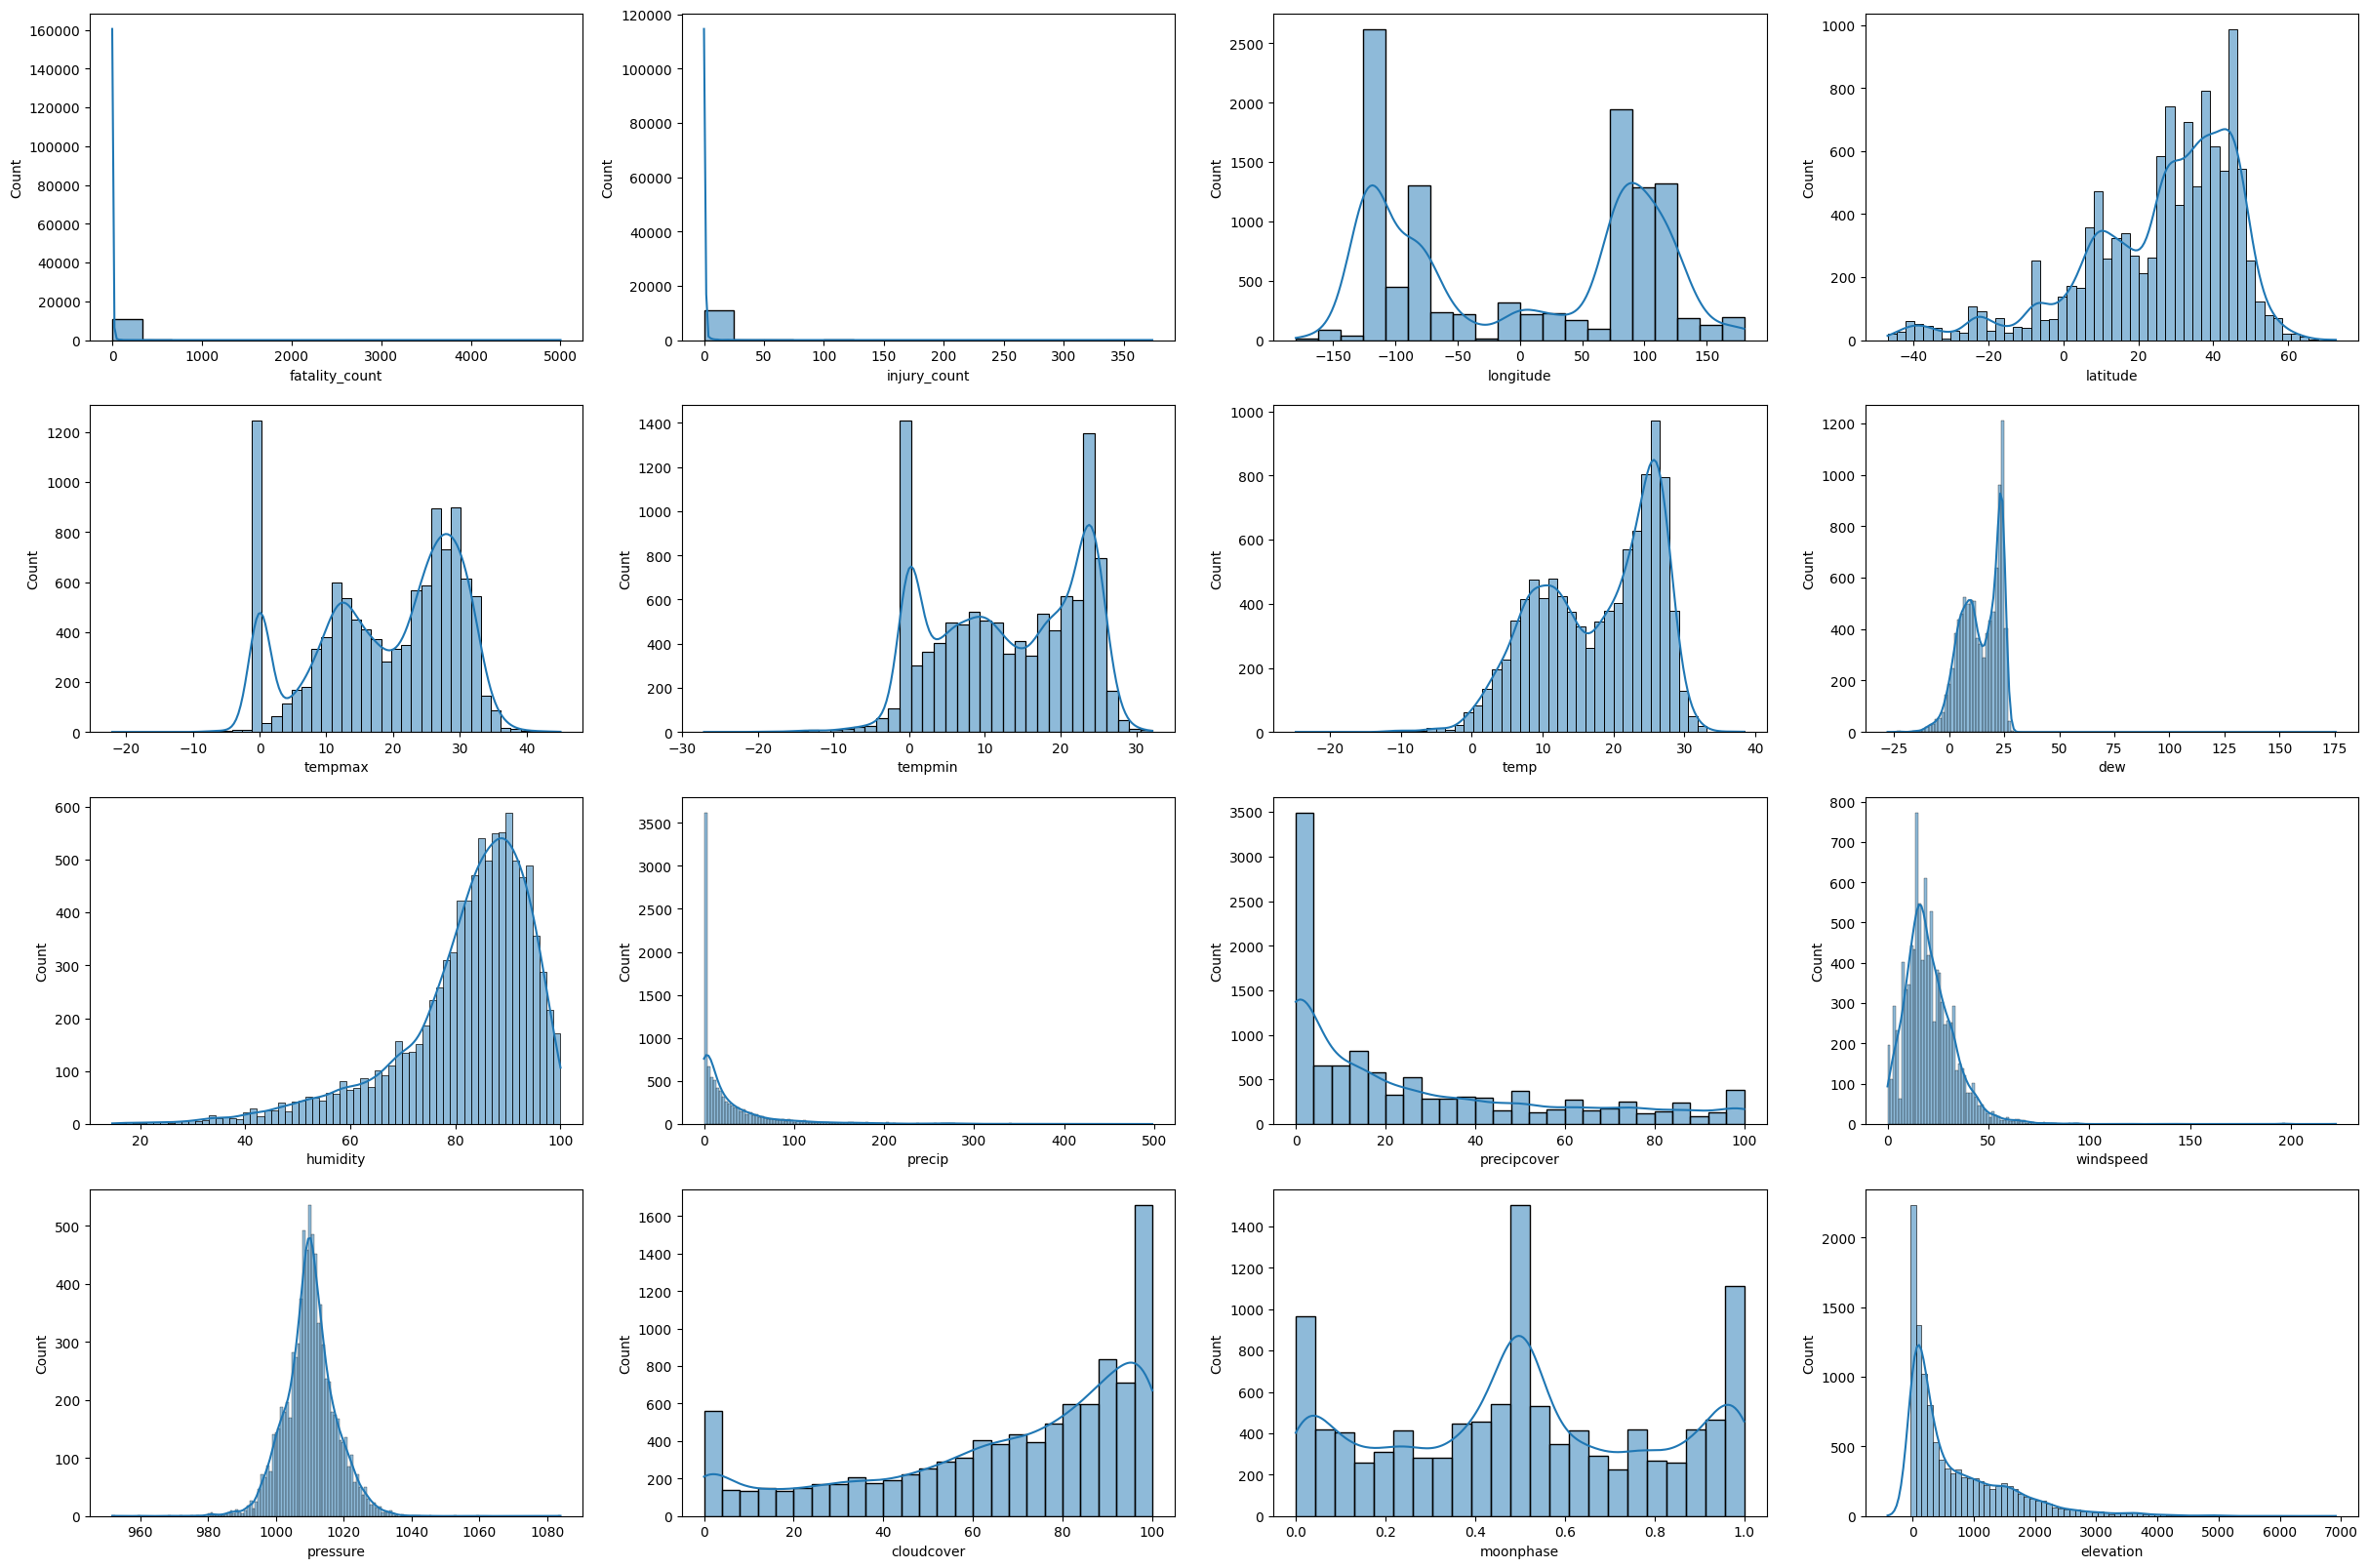

In [45]:
plt.figure(figsize=(30, 20))
for i, feature in enumerate(df.select_dtypes(include=np.number).columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.xlabel(feature)
plt.tight_layout()
plt.show()
plt.figure(figsize=(30, 20))
for i, feature in enumerate(df.select_dtypes(include=np.number).columns):
    plt.subplot(4, 4, i + 1)
    sns.kdeplot(df[feature])
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

In [46]:
df = df["pressure"].fillna(value=df["pressure"].mean())

In [47]:
df.select_dtypes(include=np.number).isnull().sum()

AttributeError: 'Series' object has no attribute 'select_dtypes'

In [48]:
df["fatality_count"].head(5)

KeyError: 'fatality_count'

In [49]:
df.boxplot(["tempmax","tempmin","temp","dew","humidity","precip","precipcover","windspeed","pressure","cloudcover","loss"])

AttributeError: 'Series' object has no attribute 'boxplot'

In [50]:
for i in ["tempmax","tempmin","temp","dew","humidity","precip","precipcover","windspeed","pressure","cloudcover","loss"]:
    df = df[i].fillna(value=df[i].median())

KeyError: 'tempmax'

In [ ]:
df.select_dtypes(include=np.number).isnull().sum()

In [97]:
time = list(df["event_date"].sort_values(ascending=True))

In [142]:
time_unique = []

for items in time:
    if items not in time_unique:
        time_unique.append(items)
        

In [61]:
time_unique[0]

'01/01/1997 12:00:00 AM'

In [ ]:
df_temp = pd.DataFrame(columns = df.columns)

for i in time_unique:
    df_temp = pd.concat([df_temp,(df.loc[df["event_date"] == i])])

In [60]:
df_temp.to_csv('dataset_timeseries.csv')

In [58]:
df = df_temp

In [56]:
len(df_temp)

11033

In [17]:
df.iloc[0]

source_name                                                                AGU
source_link                  https://blogs.agu.org/landslideblog/2008/10/14...
event_id                                                                   684
event_date                                              08/01/2008 12:00:00 AM
event_time                                                                 NaN
event_title                      Sigou Village, Loufan County, Shanxi Province
event_description            occurred early in morning, 11 villagers buried...
location_description             Sigou Village, Loufan County, Shanxi Province
location_accuracy                                                      unknown
landslide_category                                                   landslide
landslide_trigger                                                         rain
landslide_size                                                           large
landslide_setting                                   

In [ ]:
a = list(df["event_date"].sort_values(ascending=True))
print(a[0])
a

In [4]:
dfp = pd.read_csv("dataset_preprocessed.csv")
print(dfp.head(5))
print(dfp.info())
print(dfp.describe())

            event_date                                    event_title                                  event_description                           location_description location_accuracy   
0  2008-08-01 00:00:00  Sigou Village, Loufan County, Shanxi Province  occurred early in morning, 11 villagers buried...  Sigou Village, Loufan County, Shanxi Province           unknown  \
1  2009-01-02 02:00:00                            Lake Oswego, Oregon  Hours of heavy rain are to blame for an overni...                            Lake Oswego, Oregon               5km   
2  2009-07-31 00:00:00                               Dailekh district  One person was killed in Dailekh district, pol...                               Dailekh district           unknown   
3  2010-10-16 12:00:00                sitio Bakilid in barangay Lahug  Another landslide in sitio Bakilid in barangay...                sitio Bakilid in barangay Lahug               5km   
4  2012-02-16 00:00:00                         Paguite,

In [22]:
df.columns

Index(['source_name', 'source_link', 'event_id', 'event_date', 'event_time', 'event_title', 'event_description', 'location_description', 'location_accuracy', 'landslide_category',
       'landslide_trigger', 'landslide_size', 'landslide_setting', 'fatality_count', 'injury_count', 'storm_name', 'photo_link', 'notes', 'event_import_source', 'event_import_id', 'country_name',
       'country_code', 'admin_division_name', 'admin_division_population', 'gazeteer_closest_point', 'gazeteer_distance', 'submitted_date', 'created_date', 'last_edited_date', 'longitude',
       'latitude', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipcover', 'windgust', 'windspeed', 'winddir', 'pressure', 'cloudcover',
       'visibility', 'moonphase', 'conditions', 'stations', 'elevation', 'continent', 'season', 'treecover2000', 'loss', 'gain', 'soil_texture_0', 'soil_texture_10', 'soil_texture_30',
       'soil_texture_60', 'soil_texture_100', 'soi

In [6]:
dfp.columns

Index(['event_date', 'event_title', 'event_description', 'location_description', 'location_accuracy', 'landslide_category', 'landslide_trigger', 'landslide_size', 'landslide_setting',
       'fatality_count', 'injury_count', 'country_name', 'admin_division_name', 'admin_division_population', 'gazeteer_closest_point', 'gazeteer_distance', 'longitude', 'latitude', 'tempmax',
       'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipcover', 'windgust', 'windspeed', 'winddir', 'pressure', 'cloudcover', 'visibility',
       'moonphase', 'conditions', 'stations', 'elevation', 'continent', 'season', 'treecover2000', 'loss', 'gain', 'soil_texture_0', 'soil_texture_10', 'soil_texture_30', 'soil_texture_60',
       'soil_texture_100', 'soil_texture_200', 'population_density_2000', 'population_density_2005', 'population_density_2010', 'population_density_2015', 'population_density_2020'],
      dtype='object')

In [8]:
df.columns.difference(dfp.columns)

Index(['country_code', 'created_date', 'event_id', 'event_import_id', 'event_import_source', 'event_time', 'last_edited_date', 'notes', 'photo_link', 'source_link', 'source_name', 'storm_name',
       'submitted_date'],
      dtype='object')